# 1 Library Import


In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings ('ignore')

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [239]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [240]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)

# 2 Loading Data Set

In [241]:
# read the data
day= pd.read_csv('day.csv')
day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit     temp    atemp      hum  windspeed  casual  registered   cnt  
0           2 14.11085 18.18125 80.58330   10.74988     331         654   985  
1           2 14.90260 17.68695 69.60870   16.65211     131         670   801  
2           1  8.05092  9.47025 43.72730   16.63670     120        1229  1349  
3           1  8.20000 10.60610 59.04350   10.73983     108        1454  1562  
4           1  9.30524 11.46350 43.69570   12.52230      82        1518  1600

# 2.1 Basic Observation and Understandin

In [242]:
day.shape

(730, 16)

In [243]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [244]:
day.describe()

instant    season        yr      mnth   holiday   weekday  workingday  \
count 730.00000 730.00000 730.00000 730.00000 730.00000 730.00000   730.00000   
mean  365.50000   2.49863   0.50000   6.52603   0.02877   2.99726     0.68356   
std   210.87714   1.11018   0.50034   3.45022   0.16727   2.00616     0.46541   
min     1.00000   1.00000   0.00000   1.00000   0.00000   0.00000     0.00000   
25%   183.25000   2.00000   0.00000   4.00000   0.00000   1.00000     0.00000   
50%   365.50000   3.00000   0.50000   7.00000   0.00000   3.00000     1.00000   
75%   547.75000   3.00000   1.00000  10.00000   0.00000   5.00000     1.00000   
max   730.00000   4.00000   1.00000  12.00000   1.00000   6.00000     1.00000   

       weathersit      temp     atemp       hum  windspeed     casual  \
count   730.00000 730.00000 730.00000 730.00000  730.00000  730.00000   
mean      1.39452  20.31926  23.72632  62.76517   12.76362  849.24932   
std       0.54481   7.50673   8.15031  14.23759    5.19584  686.47987   
min       1.00000   2.42435   3.95348   0.00000    1.50024    2.00000   
25%       1.00000  13.81189  16.88971  52.00000    9.04165  316.25000   
50%       1.00000  20.46583  24.36822  62.62500   12.12533  717.00000   
75%       2.00000  26.88061  30.44577  72.98958   15.62559 1096.50000   
max       3.00000  35.32835  42.04480  97.25000   34.00002 3410.00000   

       registered        cnt  
count   730.00000  730.00000  
mean   3658.75753 4508.00685  
std    1559.75873 1936.01165  
min      20.00000   22.00000  
25%    2502.25000 3169.75000  
50%    3664.50000 4548.50000  
75%    4783.25000 5966.00000  
max    6946.00000 8714.00000

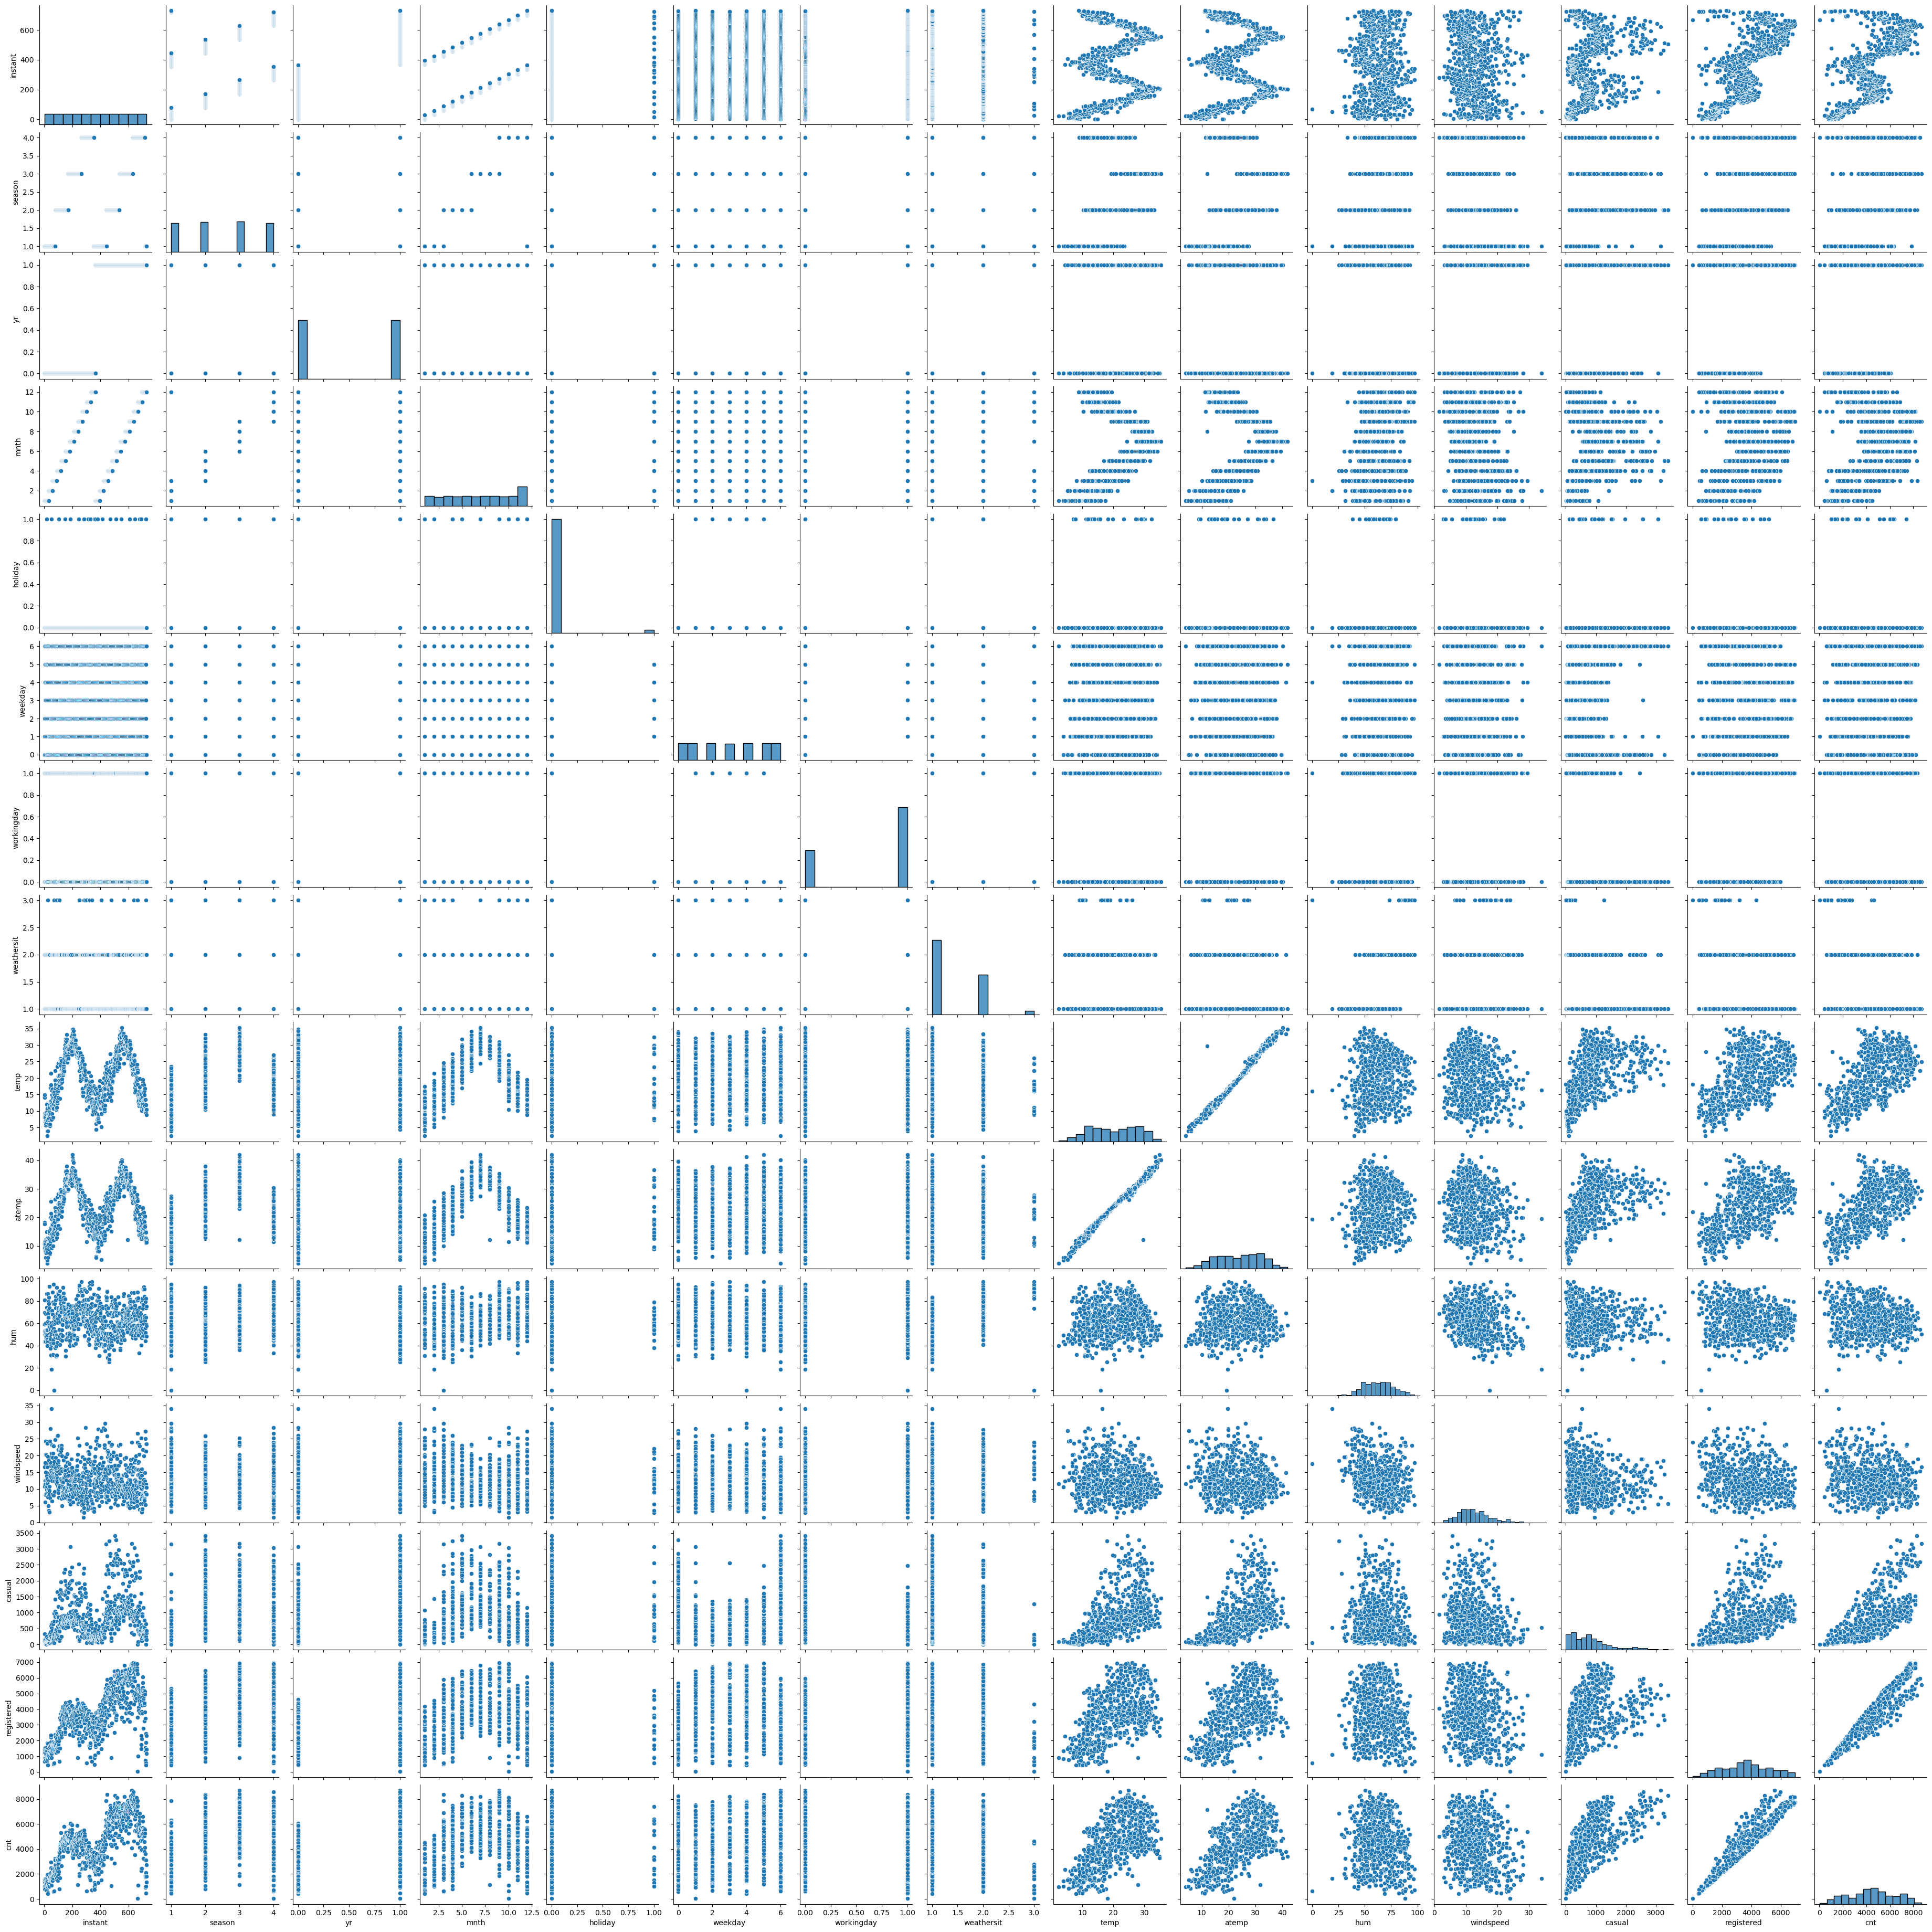

In [245]:
# visulise
sns.pairplot(day)
plt.show()

# Feature Understanding

In [246]:
# checking for duplicate values:
len(day[day.duplicated()])

0

# Dropping features based upon above logic

In [247]:
# creating variable to store list of feature names to be dropped
drop_col = ['instant', 'dteday']

#creating a loop to drop the column
for i in day.columns:
    if i in drop_col:
        day.drop(labels= i, axis= 1, inplace= True)
        
#Inspecting dataframe
day.head(2)

season  yr  mnth  holiday  weekday  workingday  weathersit     temp  \
0       1   0     1        0        6           0           2 14.11085   
1       1   0     1        0        0           0           2 14.90260   

     atemp      hum  windspeed  casual  registered  cnt  
0 18.18125 80.58330   10.74988     331         654  985  
1 17.68695 69.60870   16.65211     131         670  801

In [248]:
day.describe()

season        yr      mnth   holiday   weekday  workingday  \
count 730.00000 730.00000 730.00000 730.00000 730.00000   730.00000   
mean    2.49863   0.50000   6.52603   0.02877   2.99726     0.68356   
std     1.11018   0.50034   3.45022   0.16727   2.00616     0.46541   
min     1.00000   0.00000   1.00000   0.00000   0.00000     0.00000   
25%     2.00000   0.00000   4.00000   0.00000   1.00000     0.00000   
50%     3.00000   0.50000   7.00000   0.00000   3.00000     1.00000   
75%     3.00000   1.00000  10.00000   0.00000   5.00000     1.00000   
max     4.00000   1.00000  12.00000   1.00000   6.00000     1.00000   

       weathersit      temp     atemp       hum  windspeed     casual  \
count   730.00000 730.00000 730.00000 730.00000  730.00000  730.00000   
mean      1.39452  20.31926  23.72632  62.76517   12.76362  849.24932   
std       0.54481   7.50673   8.15031  14.23759    5.19584  686.47987   
min       1.00000   2.42435   3.95348   0.00000    1.50024    2.00000   
25%       1.00000  13.81189  16.88971  52.00000    9.04165  316.25000   
50%       1.00000  20.46583  24.36822  62.62500   12.12533  717.00000   
75%       2.00000  26.88061  30.44577  72.98958   15.62559 1096.50000   
max       3.00000  35.32835  42.04480  97.25000   34.00002 3410.00000   

       registered        cnt  
count   730.00000  730.00000  
mean   3658.75753 4508.00685  
std    1559.75873 1936.01165  
min      20.00000   22.00000  
25%    2502.25000 3169.75000  
50%    3664.50000 4548.50000  
75%    4783.25000 5966.00000  
max    6946.00000 8714.00000

# Transforming season, weathersit, mnth and weekday columns based upon above logic

In [249]:
# Transforming weathersit feature:

day['weathersit']= day['weathersit'].map({1: 'clear to Partly cloudy', 2: 'Misty and Cloudy', 3: 'Light Rain or Snow', 4: 'Heavy Rain or Snow'})


# Transforming season feature:

day['season']= day['season'].map({1:'Spring', 2: 'Summer', 3:'Fall', 4: 'Winter'})


# Mapping month feature:

day['mnth']= day['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})


# Mapping Weekday feature:
                              
day['weekday']= day['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
                              

# Re - Observing The dataset
                            
day.head()

season  yr mnth  holiday weekday  workingday              weathersit  \
0  Spring   0  Jan        0     Sat           0        Misty and Cloudy   
1  Spring   0  Jan        0     Sun           0        Misty and Cloudy   
2  Spring   0  Jan        0     Mon           1  clear to Partly cloudy   
3  Spring   0  Jan        0     Tue           1  clear to Partly cloudy   
4  Spring   0  Jan        0     Wed           1  clear to Partly cloudy   

      temp    atemp      hum  windspeed  casual  registered   cnt  
0 14.11085 18.18125 80.58330   10.74988     331         654   985  
1 14.90260 17.68695 69.60870   16.65211     131         670   801  
2  8.05092  9.47025 43.72730   16.63670     120        1229  1349  
3  8.20000 10.60610 59.04350   10.73983     108        1454  1562  
4  9.30524 11.46350 43.69570   12.52230      82        1518  1600

# Exploratory Data Analysis

Univariate Analysis

Target Variables

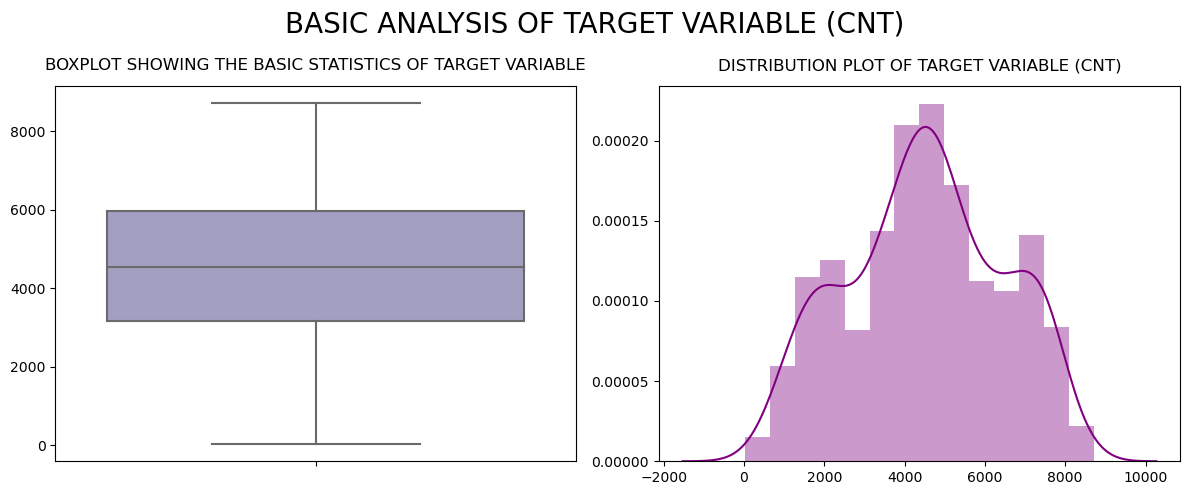

In [250]:
#  Creating subplot grid:
fig, ax= plt.subplots(nrows= 1, ncols= 2, figsize= (12, 5))

# Creating main title
fig.suptitle('basic analysis of target variable (cnt)'.upper(), fontsize= 20)


# Populating plot1:
sns.boxplot(y=day['cnt'], ax= ax[0], palette= 'Purples')
ax[0].set_title('boxplot showing the basic statistics of target variable'.upper(), 
                fontsize= 12, fontweight= 20, y= 1.02)
ax[0].set_ylabel('')
ax[0].set_xlabel('')

# Populating plot2:
sns.distplot(day['cnt'], ax= ax[1], color= 'purple') 
ax[1].set_title('distribution plot of target variable (cnt)'.upper(),
               fontsize= 12, fontweight= 20, y= 1.02)
ax[1].set_ylabel('')
ax[1].set_xlabel('')

# Setting aesthetics
plt.tight_layout()
plt.show()

# Bivariate Analysis

continous independent variables 

In [251]:
# creating a list of continous independent variables for analysis
cont_var= [i for i in day.select_dtypes(exclude= 'object').columns if day[i].nunique() > 2 and i!= 'cnt']

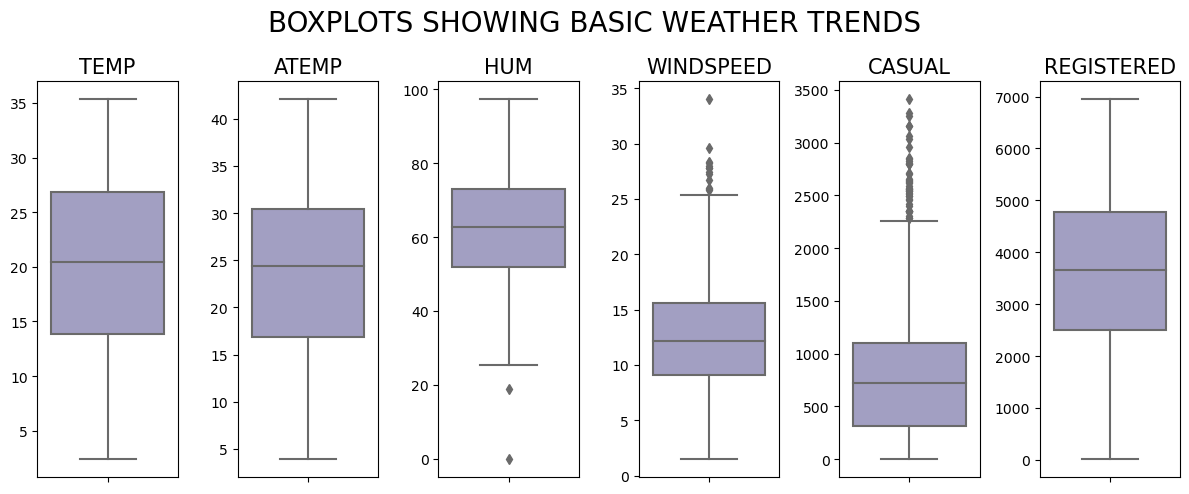

In [252]:
# Creating a subplot grid
fig, ax= plt.subplots(nrows= 1, ncols= len(cont_var), figsize= (12, 5))

# Placing main title
plt.suptitle('boxplots showing basic weather trends'.upper(), fontsize= 20)

#Looping to fill subplot grid with plots
for i in range(len(cont_var)):
    
    sns.boxplot(y=day[cont_var[i]], ax= ax[i], palette= 'Purples')
    
    # Setting aesthetics and readability
    ax[i].set_title(f'{cont_var[i].upper()}',fontsize= 15)
    ax[i].set_ylabel('')
    
# Setting final aesthetics
plt.tight_layout()
plt.show()

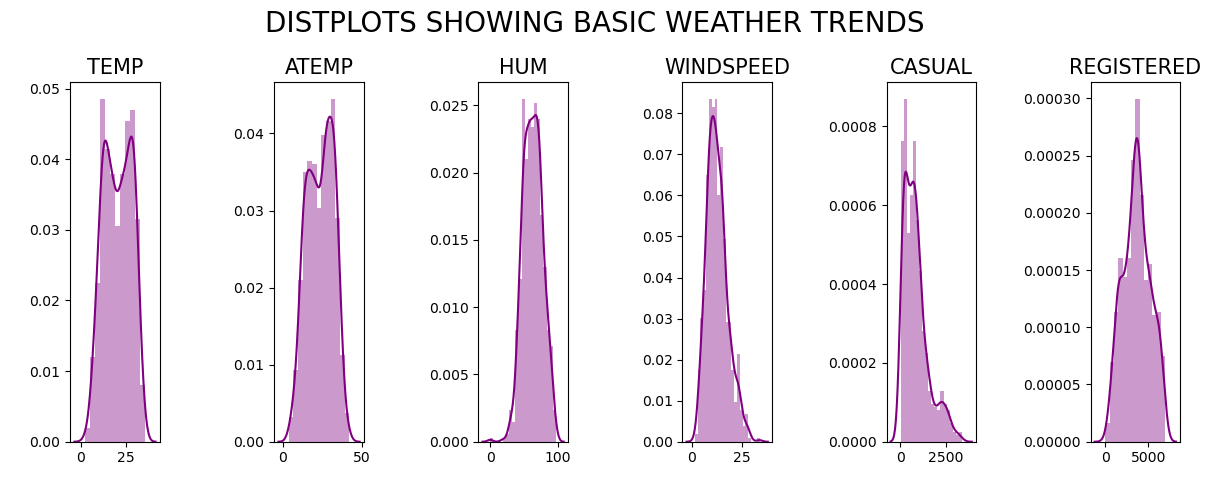

In [253]:
# Creating a subplot grid
fig, ax= plt.subplots(nrows= 1, ncols= len(cont_var), figsize= (12, 5))

# Placing main title
plt.suptitle('distplots showing basic weather trends'.upper(), fontsize= 20)

#Looping to fill subplot grid with plots
for i in range(len(cont_var)):
    
    sns.distplot(day[cont_var[i]], ax= ax[i], color= 'purple')
    
    # Setting aesthetics and readability
    ax[i].set_title(f'{cont_var[i].upper()}',fontsize= 15)
    ax[i].set_ylabel(' ')
    ax[i].set_xlabel(' ')

    
# Setting final aesthetics
plt.tight_layout()
plt.show()

# categorical independent variables

In [254]:
# Creating a list of categorical independent variables for analysis
cat_var= [i for i in day.select_dtypes(include= 'object').columns] 
cat_var.extend([i for i in day.columns if day[i].nunique() == 2])

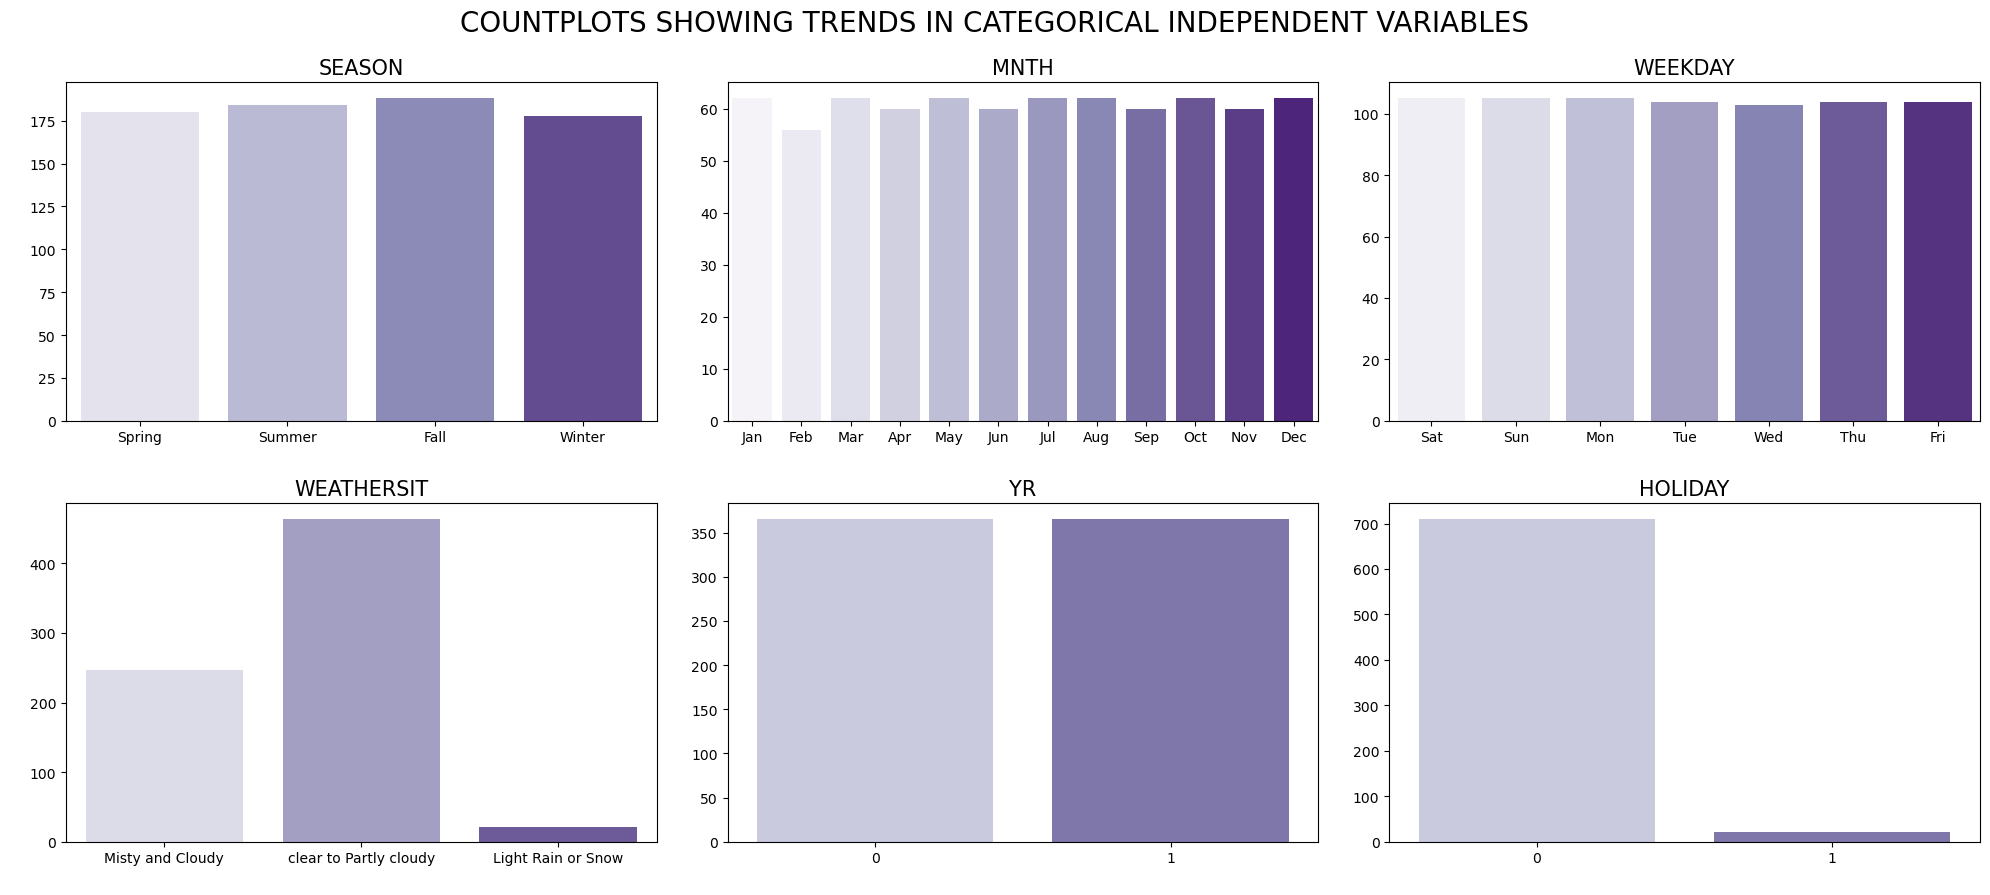

In [255]:
# Creating a subplot grid
fig, ax= plt.subplots(nrows= 2, ncols= int(len(cont_var)/2), figsize= (20, 9))

# Placing main title
plt.suptitle('countplots showing trends in categorical independent variables'.upper(), fontsize= 20, fontweight= 20, y= 0.99)

#Looping to fill subplot grid with plots
k= 0
for i in range(2):
    for j in range(int(len(cat_var)/2)):
        sns.countplot(day[cat_var[k]], ax= ax[i, j], palette= 'Purples')
    
        # Setting aesthetics and readability
        ax[i,j].set_title(f'{cat_var[k].upper()}',fontsize= 15)
        ax[i,j].set_ylabel(' ')
        ax[i,j].set_xlabel(' ')
        
        k+=1

        
# Setting final aesthetics
plt.tight_layout()
plt.show()

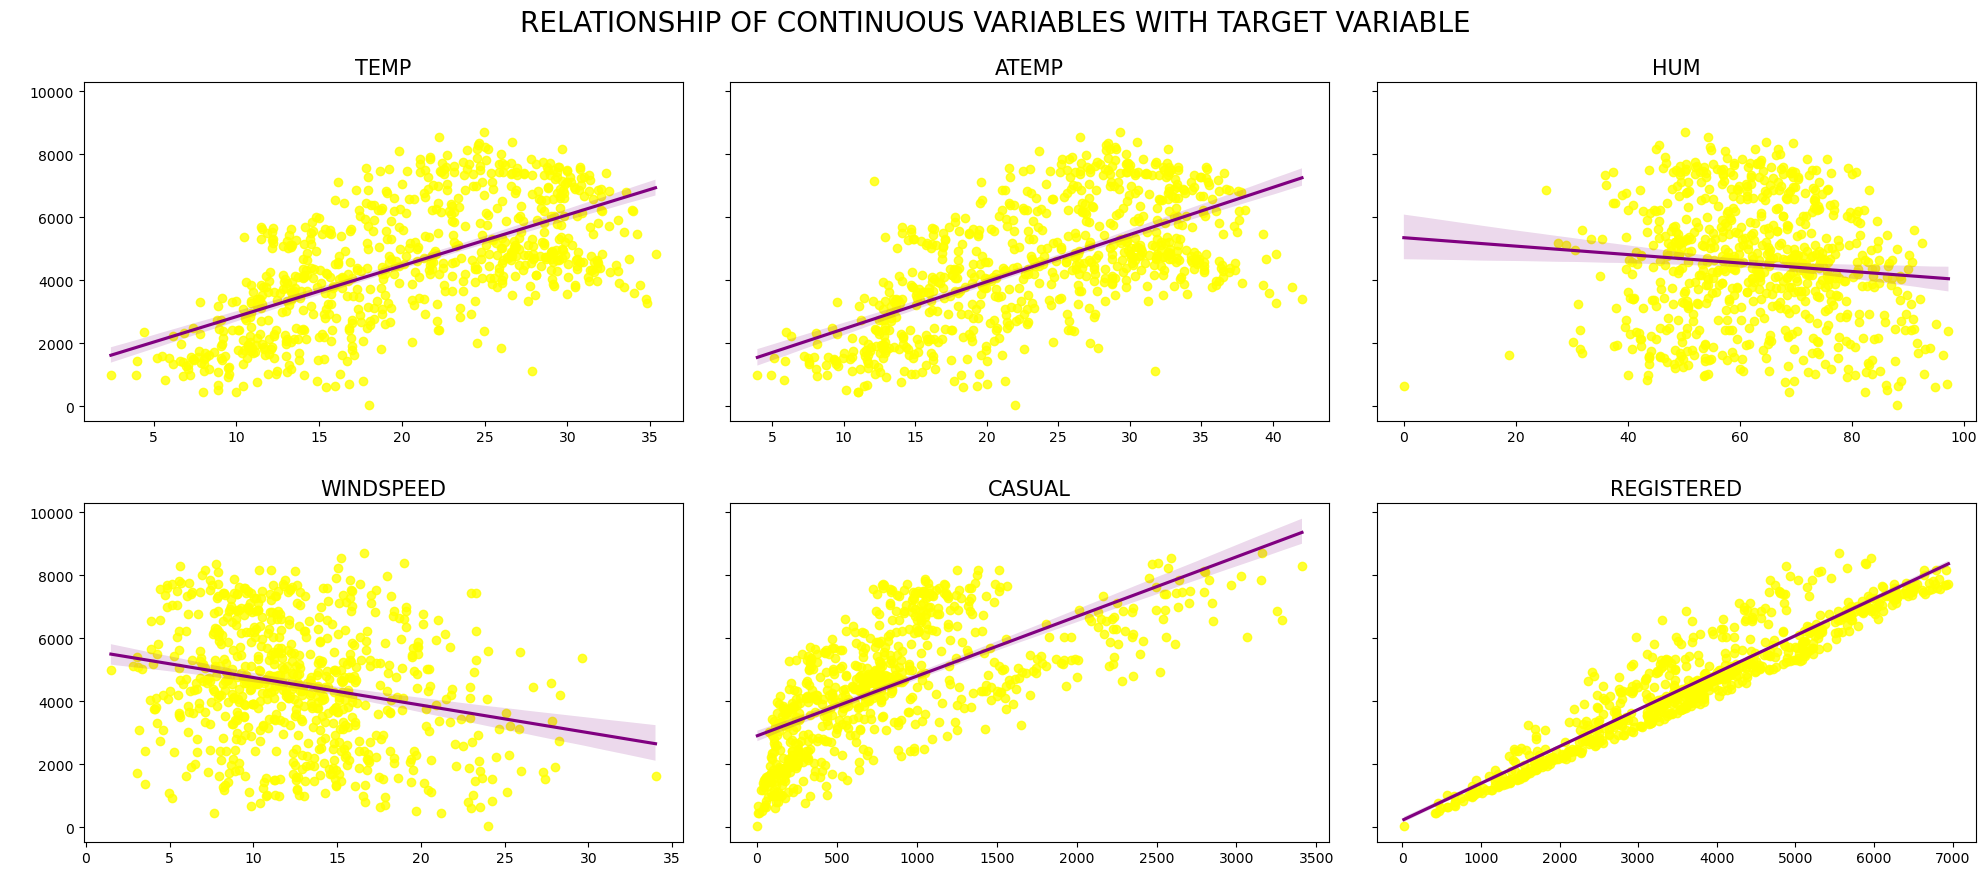

In [256]:
# Creating a subplot grid
fig, ax= plt.subplots(nrows= 2, ncols= int(len(cont_var)/2), figsize= (20, 9), sharey= True)

# Placing main title
plt.suptitle('relationship of continuous variables with target variable'.upper(), fontsize= 20, fontweight= 20, y= 0.99)

#Looping to fill subplot grid with plots
k= 0
for i in range(2):
    for j in range(int(len(cat_var)/2)):
        sns.regplot(x= day[cont_var[k]], y=day['cnt'], ax= ax[i, j],
                    scatter_kws= {'color':'yellow'}, line_kws= {'color': 'purple'})
    
        # Setting aesthetics and readability
        ax[i,j].set_title(f'{cont_var[k].upper()}', fontsize= 15)
        ax[i,j].set_ylabel(' ')
        ax[i,j].set_xlabel(' ')
        
        k+=1

        
# Setting final aesthetics
plt.tight_layout()
plt.show()

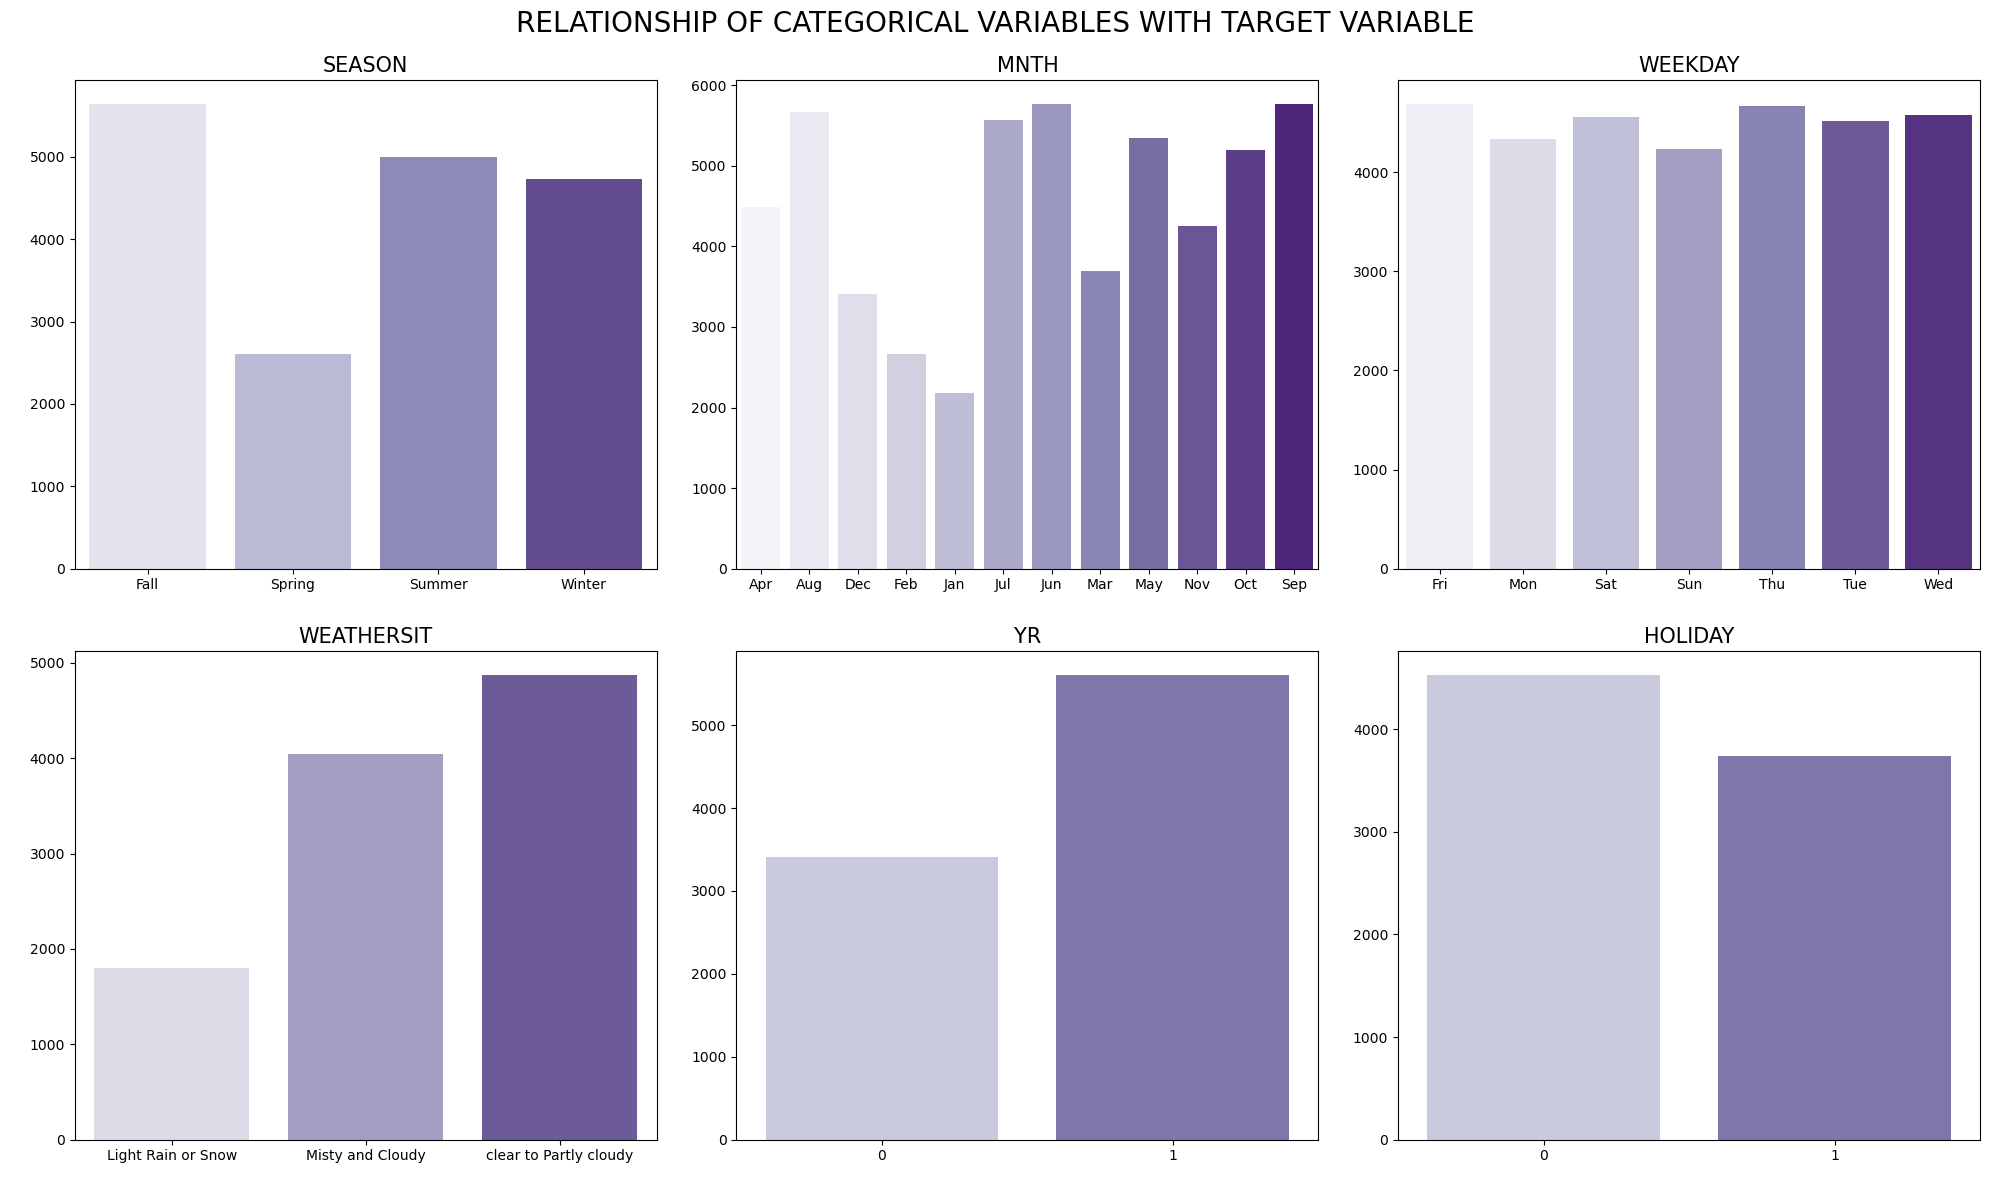

In [257]:
# Creating a subplot grid
fig, ax= plt.subplots(nrows= 2, ncols= int(len(cont_var)/2), figsize= (20, 12))

# Placing main title
plt.suptitle('relationship of categorical variables with target variable'.upper(), fontsize= 20, fontweight= 15, y= 0.99)

#Looping to fill subplot grid with plots
k= 0
for i in range(2):
    for j in range(int(len(cat_var)/2)):
        sns.barplot(y= day.groupby(by= cat_var[k]).mean()['cnt'], x=day.groupby(by= cat_var[k]).mean().index, ax= ax[i, j], palette= 'Purples')

    
        # Setting aesthetics and readability
        ax[i,j].set_title(f'{cat_var[k].upper()}', fontsize= 15)
        ax[i,j].set_ylabel(' ')
        ax[i,j].set_xlabel(' ')
        
        k+=1

        
# Setting final aesthetics
plt.tight_layout()
plt.show()

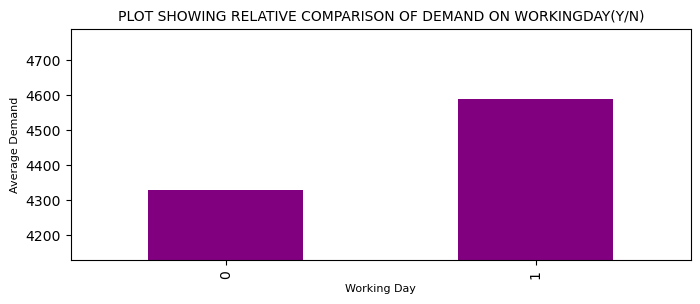

In [258]:
plt.figure(figsize= (8, 3))
plt.title('plot showing relative comparison of demand on workingday(y/n)'.upper(), fontsize= 10)
day.groupby(by= 'workingday').mean()['cnt'].plot.bar(color= 'purple')
plt.ylabel('average demand'.title(), fontsize= 8)
plt.xlabel('working day'.title(), fontsize= 8)
plt.ylim(min(day.groupby(by= 'workingday').mean()['cnt'])-200,
         max(day.groupby(by= 'workingday').mean()['cnt'])+200)
plt.show()

# Seasonwise wise variation in weather related continuous variables

In [259]:

# Initializing feature list of weather related continuous variables:
weather_var= ['temp', 'atemp', 'hum', 'windspeed'] 


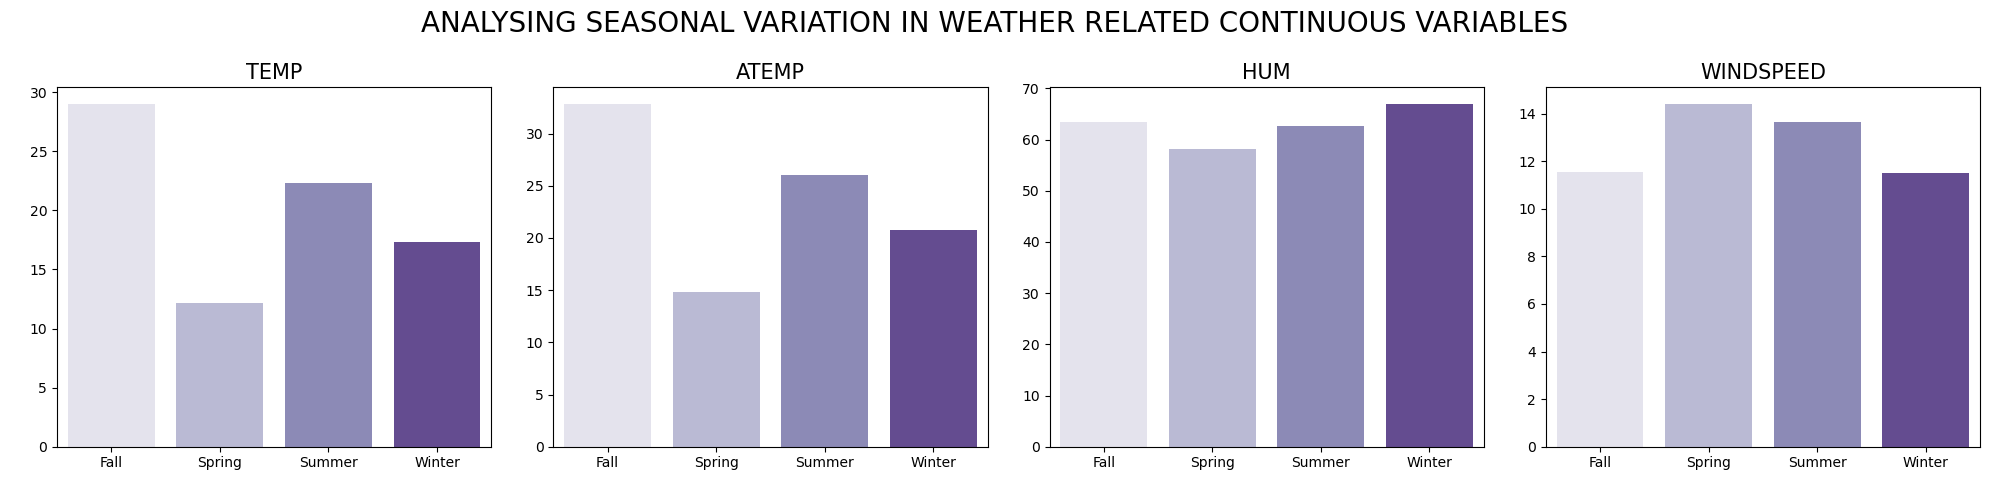

In [260]:

# Creating a subplot grid
fig, ax= plt.subplots(nrows= 1, ncols= len(weather_var), figsize= (20, 5))

# Placing main title
plt.suptitle('analysing seasonal variation in weather related continuous variables'.upper(),
             fontsize= 20, fontweight= 15, y= 0.99)


#Looping to fill subplot grid with plots
for i in range(len(weather_var)):
    sns.barplot(y= day.groupby(by= 'season').mean()[weather_var[i]], 
                x= day.groupby(by= 'season').mean().index, ax= ax[i], palette = 'Purples')
    
    
    
    # Setting aesthetics and readability
    ax[i].set_title(f'{weather_var[i].upper()}', fontsize= 15)
    ax[i].set_ylabel(' ')
    ax[i].set_xlabel(' ')
        
# Setting final aesthetics
plt.tight_layout()
plt.show()


In [261]:
day.groupby(by= ['season', 'mnth']).mean()

yr  holiday  workingday     temp    atemp      hum  \
season mnth                                                           
Fall   Aug  0.50000  0.00000     0.74194 29.05184 32.57374 63.77301   
       Jul  0.50000  0.03226     0.66129 30.97429 35.20469 59.78763   
       Jun  0.50000  0.00000     0.75000 29.81554 33.56743 54.40625   
       Sep  0.50000  0.04545     0.65909 25.59775 29.35985 71.83132   
Spring Dec  0.50000  0.09091     0.59091 12.21599 14.72987 63.84248   
       Feb  0.50000  0.03571     0.67857 12.23525 14.94305 56.32269   
       Jan  0.50000  0.04839     0.64516  9.69420 11.98979 58.58283   
       Mar  0.50000  0.00000     0.70000 16.01250 19.13531 56.98311   
Summer Apr  0.50000  0.03333     0.66667 19.26995 22.85404 58.80631   
       Jun  0.50000  0.00000     0.70000 27.16421 31.08471 59.16770   
       Mar  0.50000  0.00000     0.77273 16.01134 19.02927 62.23732   
       May  0.50000  0.03226     0.69355 24.38674 28.28310 68.89583   
Winter Dec  0.50000  0.00000     0.70000 13.87337 17.17595 68.12292   
       Nov  0.50000  0.06667     0.66667 15.13801 18.36794 62.48765   
       Oct  0.50000  0.03226     0.67742 19.88550 23.59866 69.37609   
       Sep  0.50000  0.00000     0.68750 24.39074 27.87898 70.48177   

             windspeed     casual  registered        cnt  
season mnth                                               
Fall   Aug    11.58552 1161.91935  4502.50000 5664.41935  
       Jul    11.12594 1260.59677  4303.08065 5563.67742  
       Jun    12.90432 1188.05000  4581.35000 5769.40000  
       Sep    11.39800 1184.86364  4487.84091 5672.70455  
Spring Dec    14.30449  293.77273  1660.68182 1954.45455  
       Feb    14.49457  266.03571  2403.92857 2669.96429  
       Jan    13.82229  194.22581  1982.11290 2176.33871  
       Mar    15.15784  678.85000  2872.77500 3551.62500  
Summer Apr    15.71031 1013.36667  3471.53333 4484.90000  
       Jun    12.18254 1253.62500  4520.22500 5773.85000  
       Mar    14.48999  785.90909  3162.04545 3947.95455  
       May    12.26026 1214.27419  4135.50000 5349.77419  
Winter Dec    10.47337  380.75000  3820.20000 4200.95000  
       Nov    12.31470  610.05000  3637.13333 4247.18333  
       Oct    11.73877  963.87097  4235.35484 5199.22581  
       Sep    10.34921 1136.81250  4887.68750 6024.50000

# Weathersitwise variation in weather related continous variables

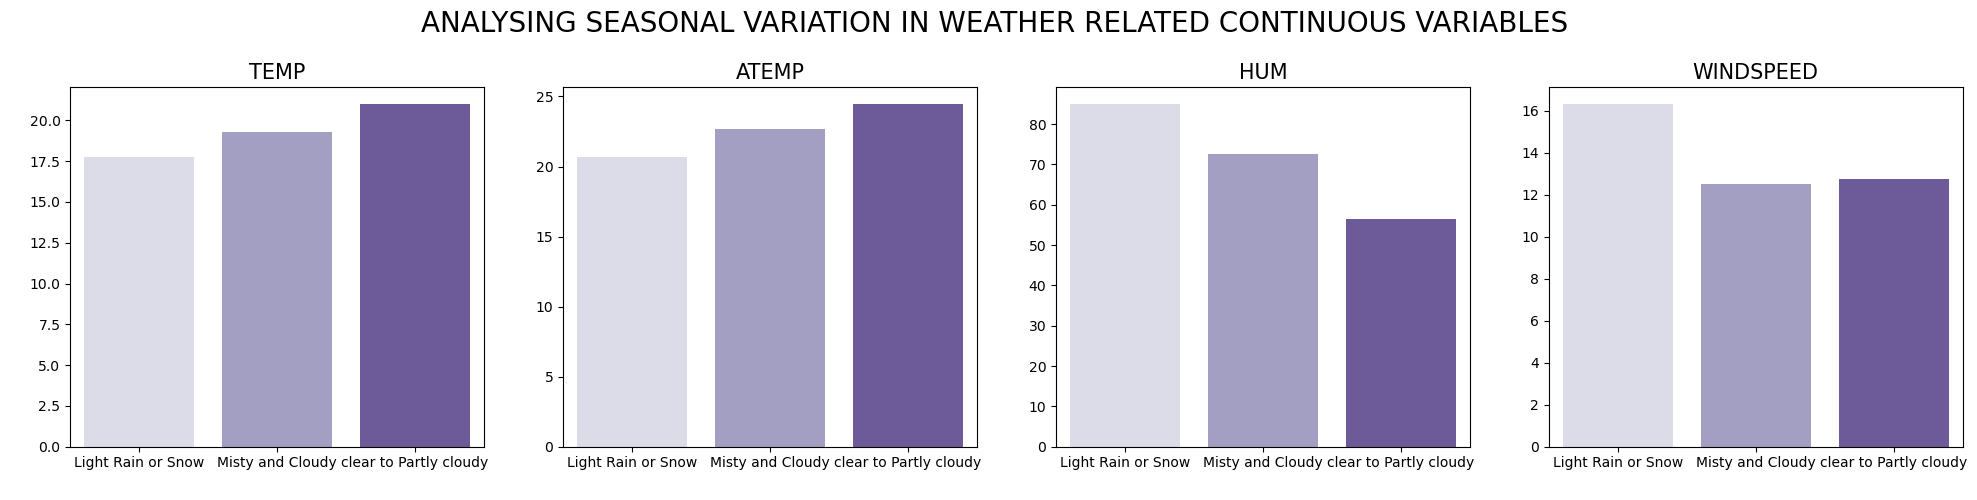

In [262]:
# Creating a subplot grid
fig, ax= plt.subplots(nrows= 1, ncols= len(weather_var), figsize= (20, 5))

# Placing main title
plt.suptitle('analysing seasonal variation in weather related continuous variables'.upper(),
             fontsize= 20, fontweight= 15, y= 0.99)


#Looping to fill subplot grid with plots
for i in range(len(weather_var)):
    sns.barplot(y= day.groupby(by= 'weathersit').mean()[weather_var[i]], 
                x= day.groupby(by= 'weathersit').mean().index, ax= ax[i], palette = 'Purples')
    
    
    
    # Setting aesthetics and readability
    ax[i].set_title(f'{weather_var[i].upper()}', fontsize= 15)
    ax[i].set_ylabel(' ')
    ax[i].set_xlabel(' ')
        
# Setting final aesthetics
plt.tight_layout()
plt.show()

Monthwise variation in weathersit


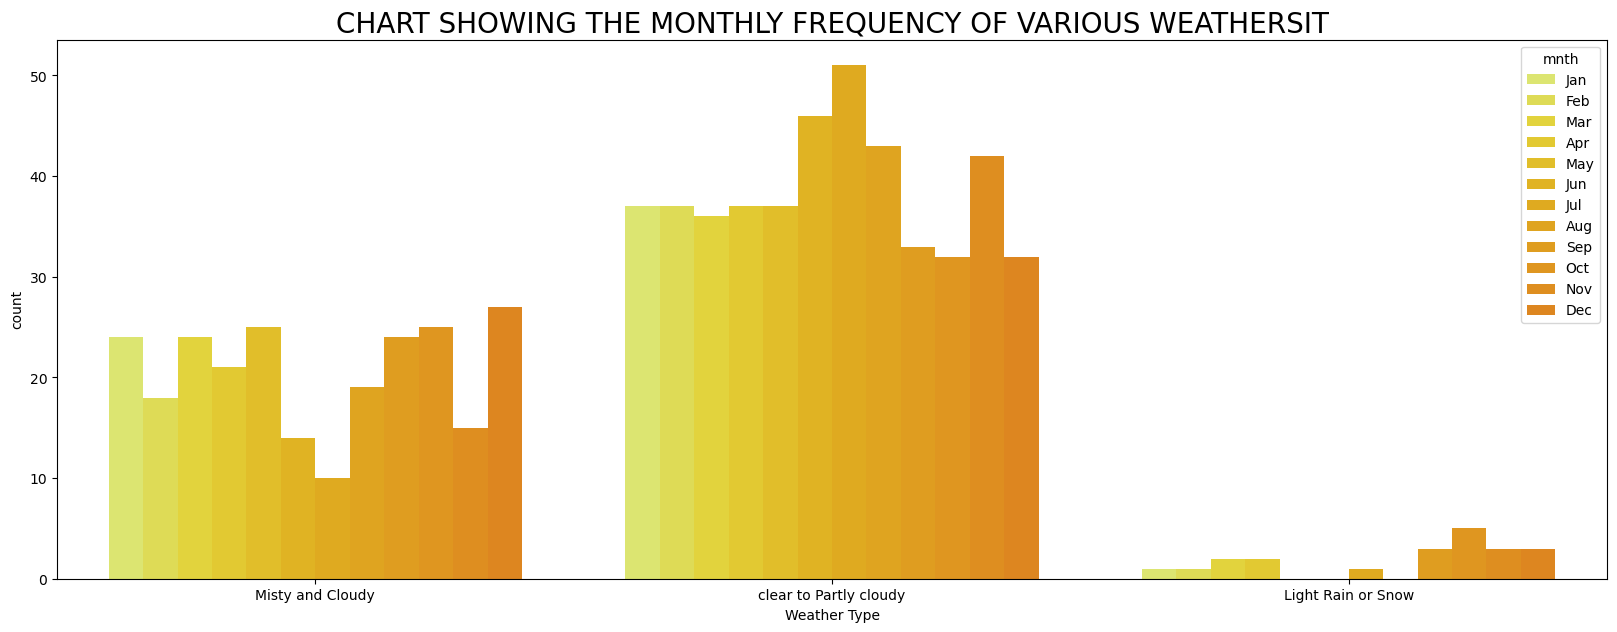

In [263]:
# Defining Figure size
plt.figure(figsize= (20, 7))

# Plotting
sns.countplot('weathersit', data= day, hue= 'mnth', palette= 'Wistia')

# Adjusting Labels and title
plt.title('chart showing the monthly frequency of various weathersit'.upper(), fontsize=20)
plt.xlabel('weather type'.title())

plt.show()

# Intervariable Relationship

Intervariable Relationship using pairplot


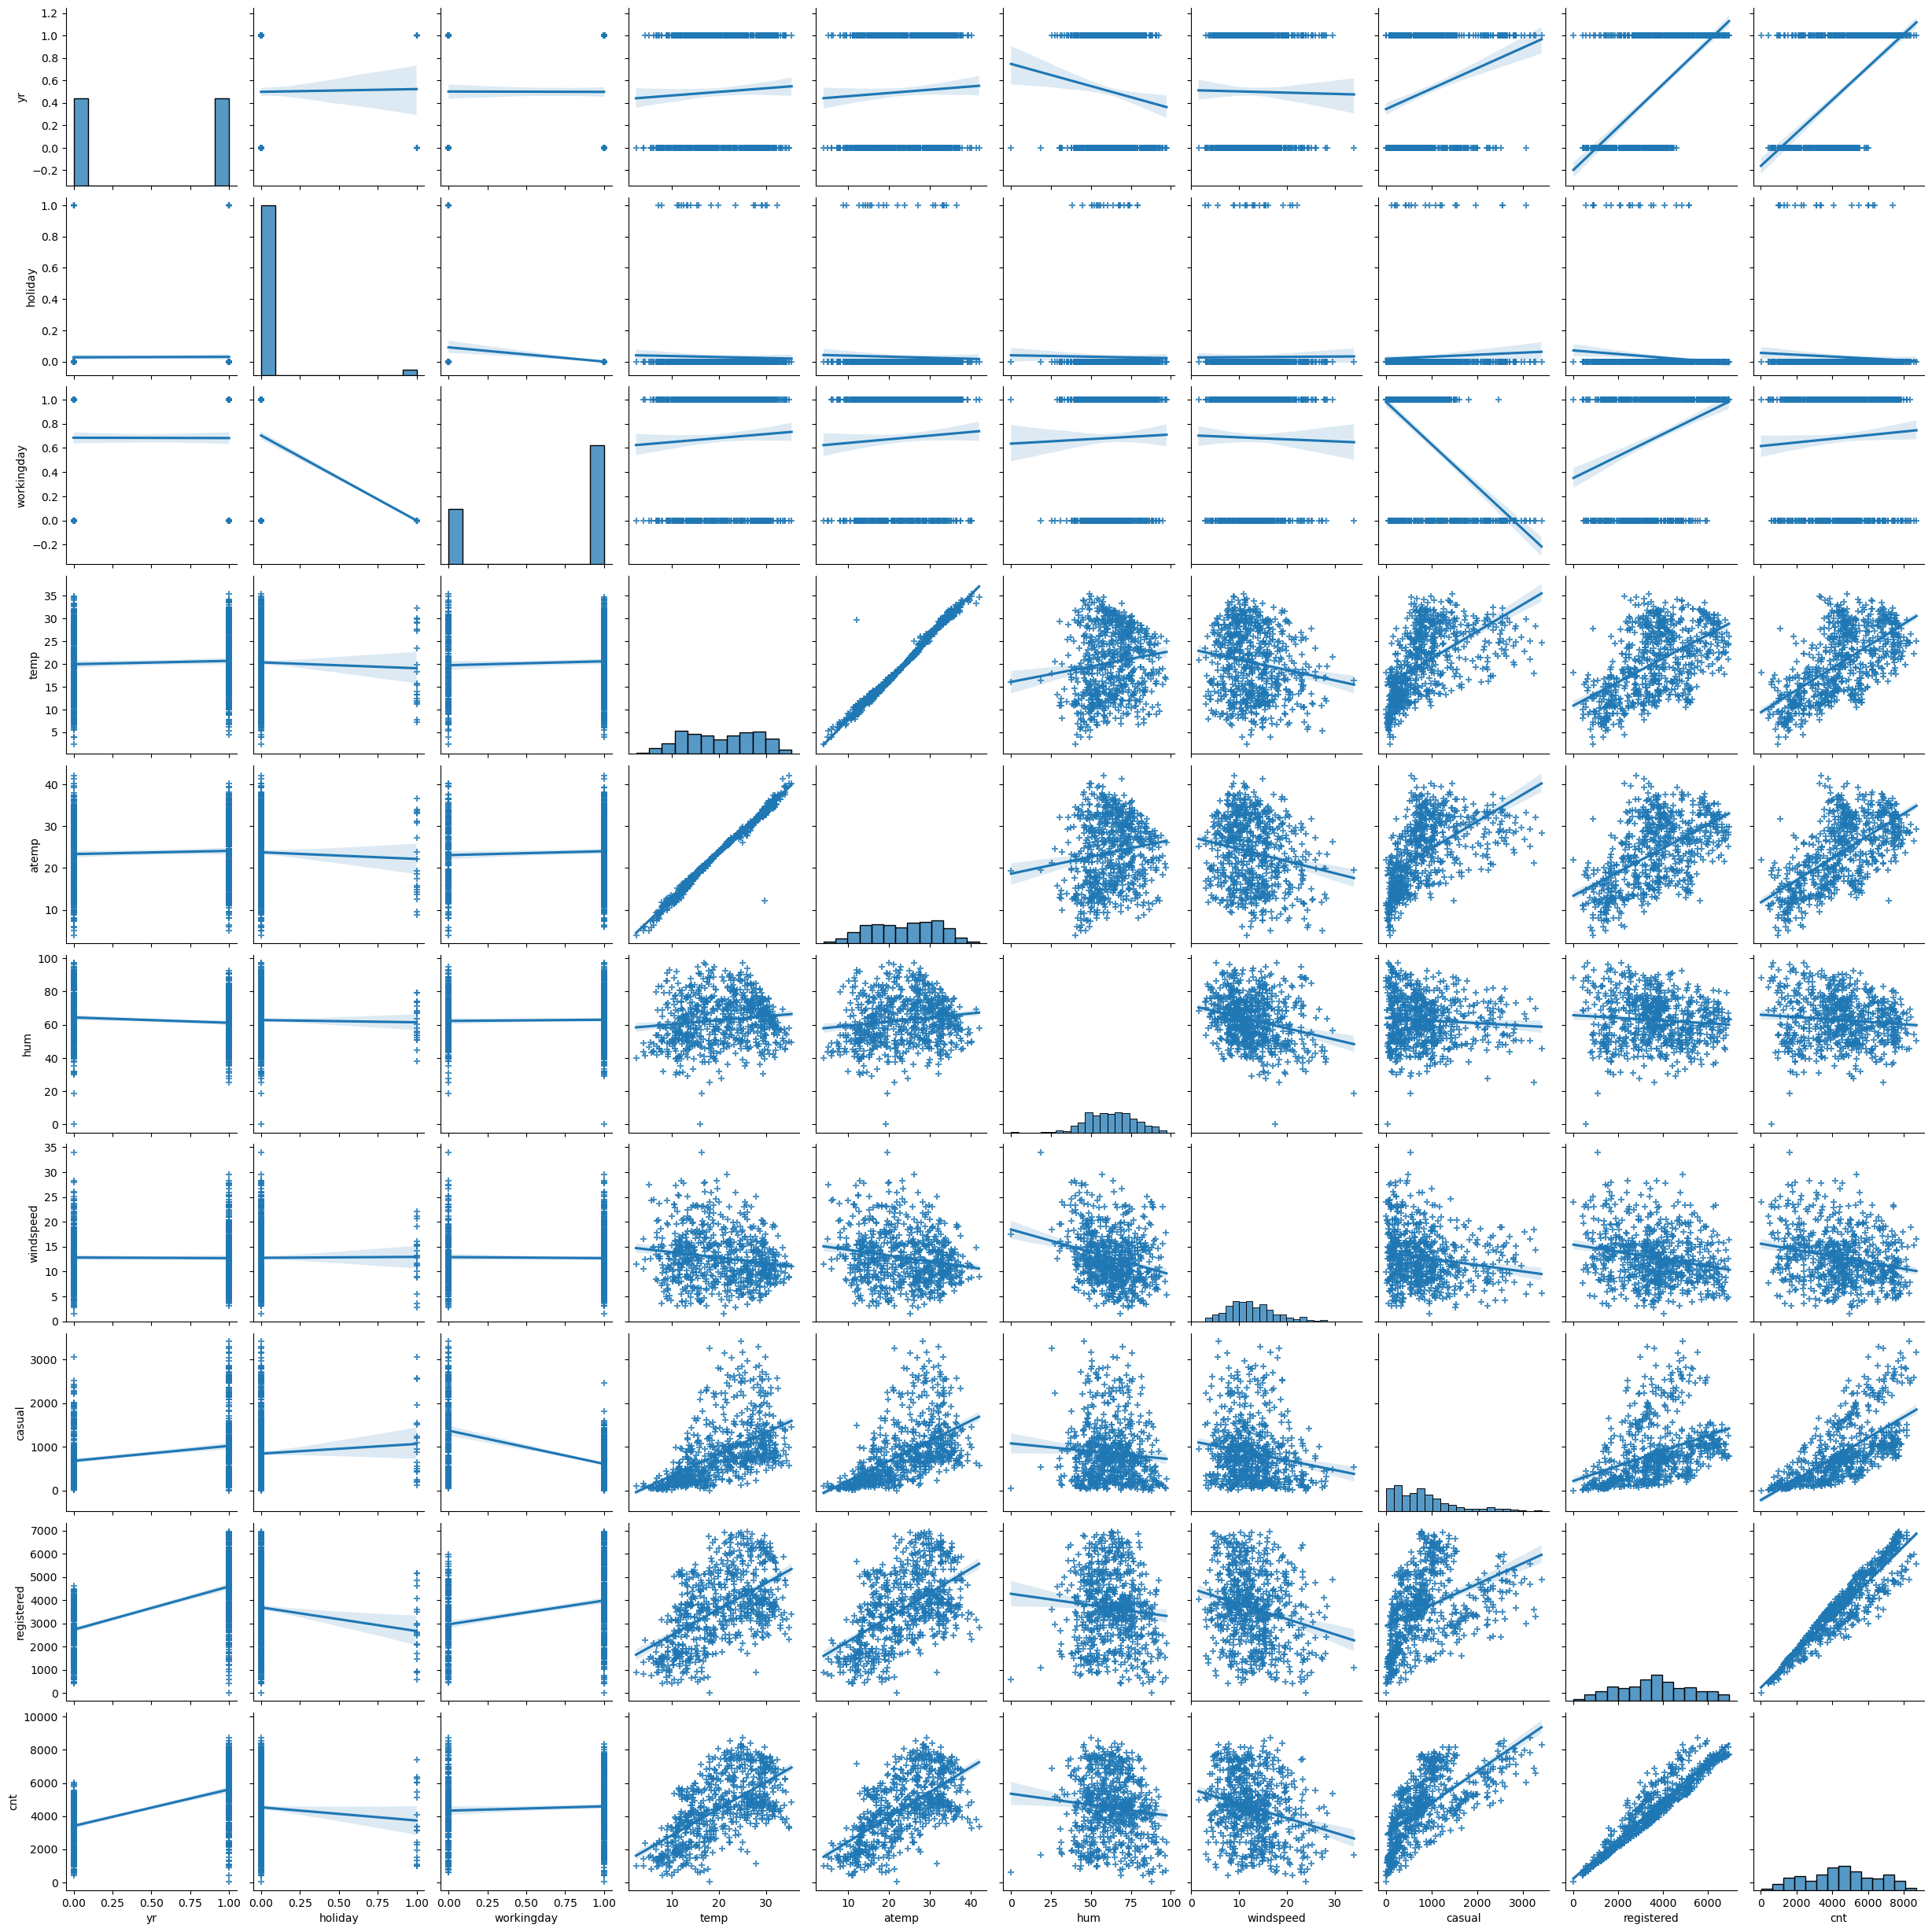

In [264]:
sns.pairplot(day, kind= 'reg', markers= '+', palette= 'Purples')
plt.show()


In [265]:
day.drop(labels= ['casual', 'registered'], axis= 1, inplace= True)

In [266]:

# Re-inspecting dataframe
day.head(2)


season  yr mnth  holiday weekday  workingday        weathersit     temp  \
0  Spring   0  Jan        0     Sat           0  Misty and Cloudy 14.11085   
1  Spring   0  Jan        0     Sun           0  Misty and Cloudy 14.90260   

     atemp      hum  windspeed  cnt  
0 18.18125 80.58330   10.74988  985  
1 17.68695 69.60870   16.65211  801

# 2 Intervariable Relationship using heatmap

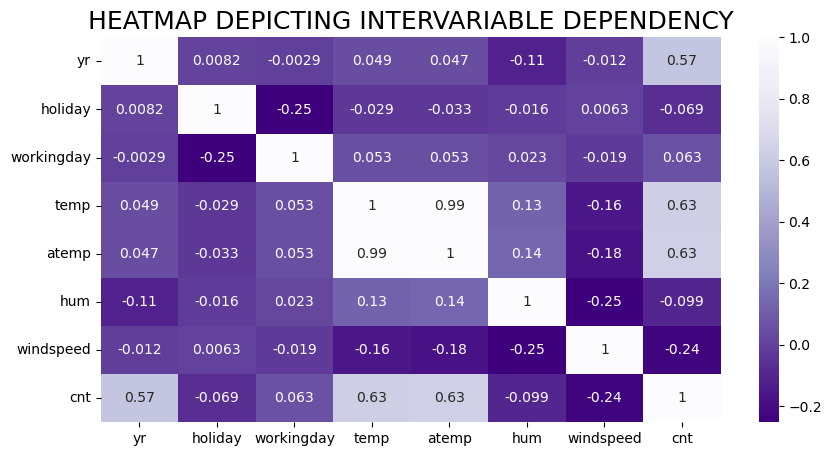

In [267]:
# Setting plot size
plt.figure(figsize= (10, 5))

# Plotting Heatmap
sns.heatmap(day.corr(), annot= True, cmap= 'Purples_r')

# Setting title
plt.title('heatmap depicting intervariable dependency'.upper(), fontsize= 18, y= 1)

plt.show()

# 3. Analysis of Growth Over Last Year (GOLY) of 2019

In [268]:

# Creating fresh dataframe showing monthly demand growth over last year
growth_pd= day.pivot_table(index= 'mnth', columns= 'yr', values= 'cnt', aggfunc= 'mean')

# Amending column names
growth_pd.columns= ['2018', '2019']

# % growth column
growth_pd['percent growth']= round(((growth_pd['2019'] - growth_pd['2018'])/growth_pd['2018'])*100, 2)

#Sorting dataframe
growth_pd= growth_pd.sort_values(by= 'percent growth', ascending= False)

# Observing the final results
growth_pd


2018       2019  percent growth
mnth                                      
Mar  2065.96774 5318.54839       157.44000
Jan  1231.90323 3120.77419       153.33000
Feb  1721.96429 3617.96429       110.11000
Apr  3162.33333 5807.46667        83.64000
Sep  4247.26667 7285.76667        71.54000
Oct  3984.22581 6414.22581        60.99000
Aug  4409.38710 6919.45161        56.93000
Nov  3405.56667 5088.80000        49.43000
May  4381.32258 6318.22581        44.21000
Jul  4559.38710 6567.96774        44.05000
Dec  2816.87097 3990.74194        41.67000
Jun  4783.73333 6761.00000        41.33000

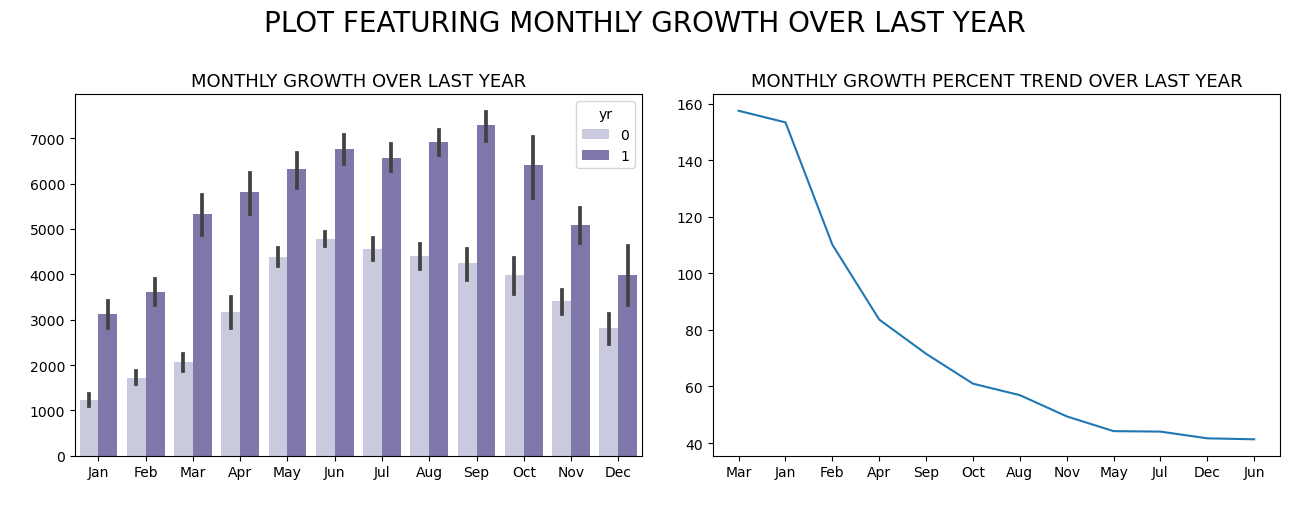

In [269]:
# Setting subplot grid
fig, ax= plt.subplots(nrows= 1, ncols= 2, figsize= (13, 5))

# Setting main title
plt.suptitle('plot featuring monthly Growth over last year'.upper(), fontsize= 20, y= 1.01)

# Populating plot 1
sns.barplot(x= 'mnth', y= 'cnt', data= day, hue= 'yr', ax= ax[0], palette= 'Purples',)
ax[0].set_ylabel(' ')
ax[0].set_xlabel(' ') 
ax[0].set_title('monthly growth over last year'.upper(), fontsize= 13)
    
# Populating plot 2
sns.lineplot(x= growth_pd.index, y= growth_pd['percent growth'], ax= ax[1], palette= 'Purples')
ax[1].set_ylabel(' ')
ax[1].set_xlabel(' ') 
ax[1].set_title('monthly growth percent trend over last year'.upper(), fontsize= 13)


# Setting final aesthetics
plt.tight_layout()
plt.show()


# Multi-Linear Regression Model development

In [270]:
# Re-Inspection of data

day.head()


season  yr mnth  holiday weekday  workingday              weathersit  \
0  Spring   0  Jan        0     Sat           0        Misty and Cloudy   
1  Spring   0  Jan        0     Sun           0        Misty and Cloudy   
2  Spring   0  Jan        0     Mon           1  clear to Partly cloudy   
3  Spring   0  Jan        0     Tue           1  clear to Partly cloudy   
4  Spring   0  Jan        0     Wed           1  clear to Partly cloudy   

      temp    atemp      hum  windspeed   cnt  
0 14.11085 18.18125 80.58330   10.74988   985  
1 14.90260 17.68695 69.60870   16.65211   801  
2  8.05092  9.47025 43.72730   16.63670  1349  
3  8.20000 10.60610 59.04350   10.73983  1562  
4  9.30524 11.46350 43.69570   12.52230  1600

# creating dummy variables

In [271]:

# Creating new dataframe for ML algorithm (deep copy of day):
day_ml= day.copy()


In [272]:
# Creating a list of features that need to be converted to dummy variable:

dummy_list= [ i for i in day_ml.select_dtypes(include= 'object').columns]

#Creating dummies

for i in dummy_list:
    my_d= pd.get_dummies(data= day_ml[i], drop_first= True)
    day_ml= pd.concat([day_ml, my_d], axis= 1).drop(labels= i, axis=1)
    

In [273]:
# Re Inspecting Dataframe
day_ml.head()


yr  holiday  workingday     temp    atemp      hum  windspeed   cnt  \
0   0        0           0 14.11085 18.18125 80.58330   10.74988   985   
1   0        0           0 14.90260 17.68695 69.60870   16.65211   801   
2   0        0           1  8.05092  9.47025 43.72730   16.63670  1349   
3   0        0           1  8.20000 10.60610 59.04350   10.73983  1562   
4   0        0           1  9.30524 11.46350 43.69570   12.52230  1600   

   Spring  Summer  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  \
0       1       0  ...    0    0    0    1    0    0    0    0   
1       1       0  ...    0    0    0    0    1    0    0    0   
2       1       0  ...    0    0    1    0    0    0    0    0   
3       1       0  ...    0    0    0    0    0    0    1    0   
4       1       0  ...    0    0    0    0    0    0    0    1   

   Misty and Cloudy  clear to Partly cloudy  
0                 1                       0  
1                 1                       0  
2                 0                       1  
3                 0                       1  
4                 0                       1  

[5 rows x 30 columns]

In [274]:
print(f'Our new dataset post dummy creation has {day_ml.shape[0]} rows and {day_ml.shape[1]} columns,')

Our new dataset post dummy creation has 730 rows and 30 columns,


# Intervariables interaction

heatmap

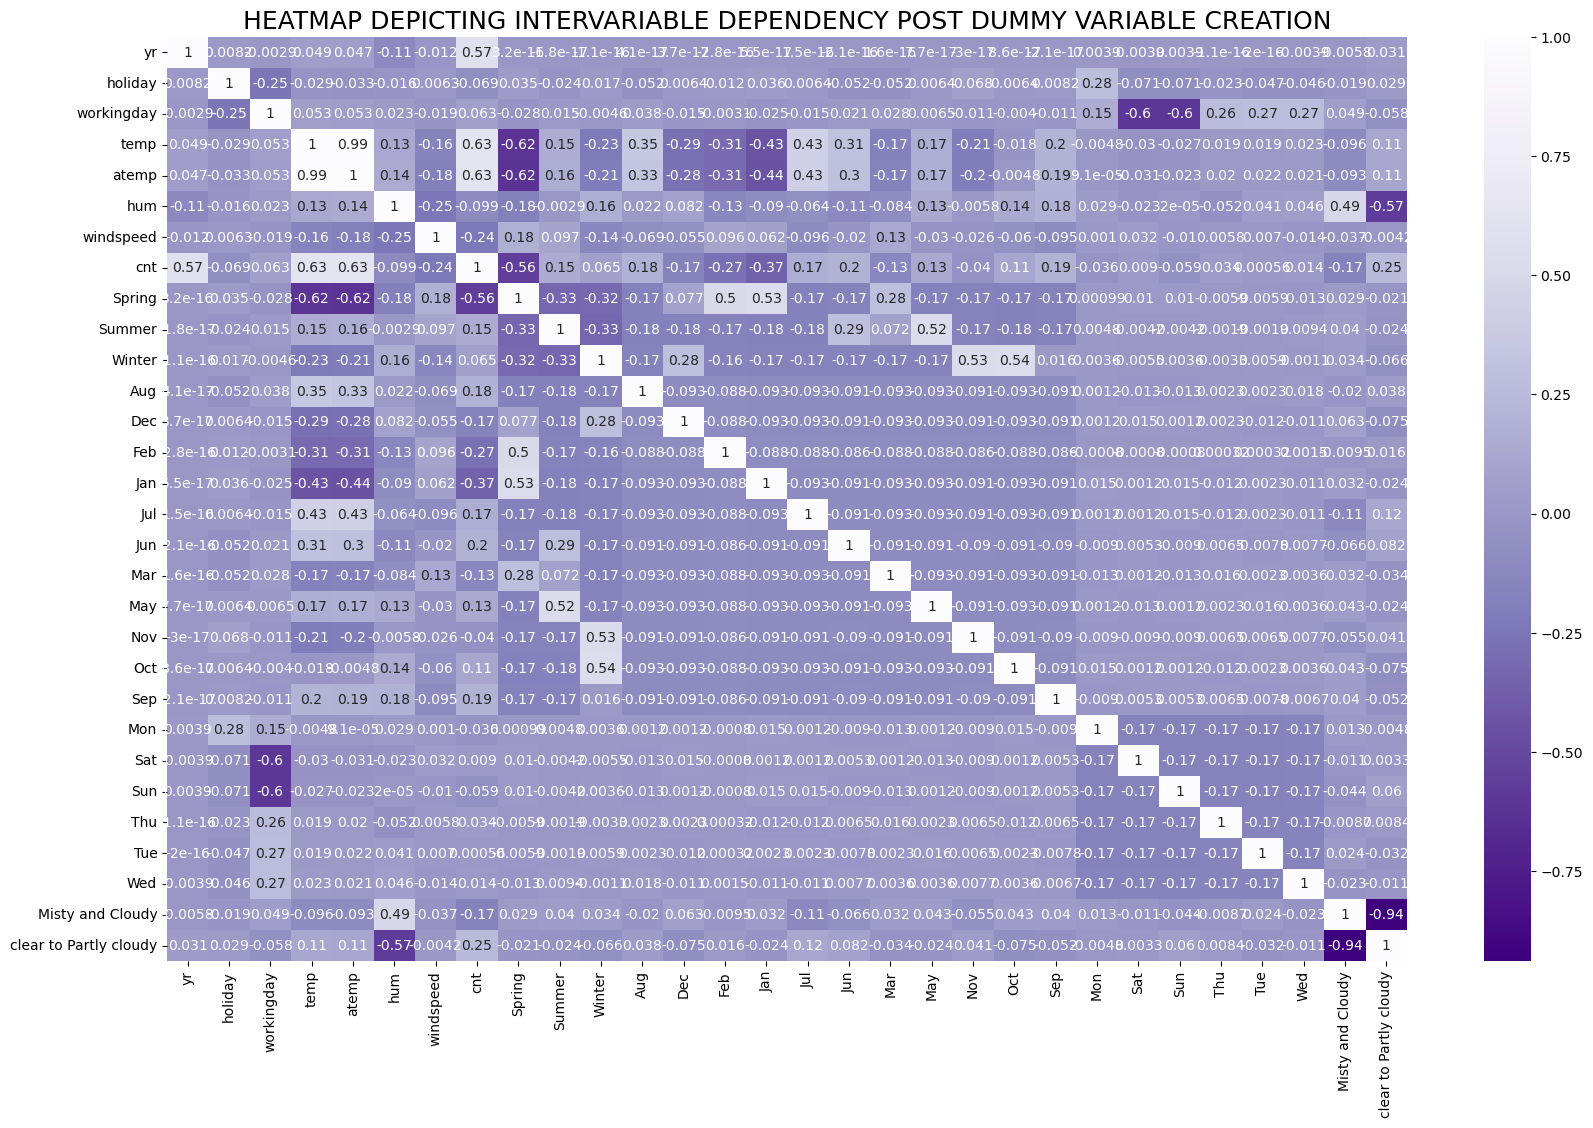

In [275]:

# Re-plotting heatmap

plt.figure(figsize=(20,12))
plt.title('heatmap depicting intervariable dependency post dummy variable creation'.upper(), fontsize= 18, y= 1)
sns.heatmap(day_ml.corr(), annot= True, cmap= 'Purples_r', fmt= '.2g')
plt.show() 


In [276]:

# initiating variables:

col_list= []
ind_list= []
corr_type= []
corr_strength= []
corr_list= []

# Developing Loop

for i in range(len(day_ml.corr().columns)):
    for j in range(len(day_ml.corr().index)):
        
        if day_ml.corr().columns[i] != day_ml.corr().index[j] and day_ml.corr().iloc[i, j] != 0:
            
            if day_ml.corr().iloc[i,j] < 0:
                
                if day_ml.corr().iloc[i, j] <= -0.7:
                    col_list.append(day_ml.corr().columns[i])
                    ind_list.append(day_ml.corr().index[j])
                    corr_type.append('Negative')
                    corr_strength.append('Strong')
                    corr_list.append(round(day_ml.corr().iloc[i,j], 2))
            
                elif day_ml.corr().iloc[i,j] < -0.3:
                    col_list.append(day_ml.corr().columns[i])
                    ind_list.append(day_ml.corr().index[j])
                    corr_type.append('Negative')
                    corr_strength.append('Medium')
                    corr_list.append(round(day_ml.corr().iloc[i, j], 2))
            
            
            else:
            
                if day_ml.corr().iloc[i, j] >= 0.7:
                    col_list.append(day_ml.corr().columns[i])
                    ind_list.append(day_ml.corr().index[j])
                    corr_type.append('Positive')
                    corr_strength.append('Strong')
                    corr_list.append(round(day_ml.corr().iloc[i, j], 2))
            
                elif day_ml.corr().iloc[i,j] > 0.3:
                    col_list.append(day_ml.corr().columns[i])
                    ind_list.append(day_ml.corr().index[j])
                    corr_type.append('Positive')
                    corr_strength.append('Strong')
                    corr_list.append(round(day_ml.corr().iloc[i, j], 2))
            
            
            

In [277]:
# New dataframe initialized to show intervariable relationships

day_corr_df= pd.DataFrame({'Column': col_list, 'Column2': ind_list, 'Relationship Strength': corr_strength,'Relation Type': corr_type, 'Correlation C': corr_list})

# Inspecting the dataframe
day_corr_df

Column                 Column2 Relationship Strength  \
0                       yr                     cnt                Strong   
1               workingday                     Sat                Medium   
2               workingday                     Sun                Medium   
3                     temp                   atemp                Strong   
4                     temp                     cnt                Strong   
..                     ...                     ...                   ...   
57                     Sun              workingday                Medium   
58        Misty and Cloudy                     hum                Strong   
59        Misty and Cloudy  clear to Partly cloudy                Strong   
60  clear to Partly cloudy                     hum                Medium   
61  clear to Partly cloudy        Misty and Cloudy                Strong   

   Relation Type  Correlation C  
0       Positive        0.57000  
1       Negative       -0.60000  
2       Negative       -0.60000  
3       Positive        0.99000  
4       Positive        0.63000  
..           ...            ...  
57      Negative       -0.60000  
58      Positive        0.49000  
59      Negative       -0.94000  
60      Negative       -0.57000  
61      Negative       -0.94000  

[62 rows x 5 columns]

In [278]:
# Displaying feature combinations of strong positive correlation
day_corr_df[(day_corr_df['Relationship Strength']== 'Strong') 
            & (day_corr_df['Relation Type']== 'Positive')].sort_values(by= 'Correlation C', ascending= False)


Column           Column2 Relationship Strength Relation Type  \
11             atemp              temp                Strong      Positive   
3               temp             atemp                Strong      Positive   
22               cnt              temp                Strong      Positive   
4               temp               cnt                Strong      Positive   
12             atemp               cnt                Strong      Positive   
23               cnt             atemp                Strong      Positive   
0                 yr               cnt                Strong      Positive   
21               cnt                yr                Strong      Positive   
55               Oct            Winter                Strong      Positive   
39            Winter               Oct                Strong      Positive   
54               Nov            Winter                Strong      Positive   
48               Jan            Spring                Strong      Positive   
38            Winter               Nov                Strong      Positive   
32            Spring               Jan                Strong      Positive   
53               May            Summer                Strong      Positive   
35            Summer               May                Strong      Positive   
44               Feb            Spring                Strong      Positive   
31            Spring               Feb                Strong      Positive   
19               hum  Misty and Cloudy                Strong      Positive   
58  Misty and Cloudy               hum                Strong      Positive   
17             atemp               Jul                Strong      Positive   
49               Jul              temp                Strong      Positive   
50               Jul             atemp                Strong      Positive   
9               temp               Jul                Strong      Positive   
40               Aug              temp                Strong      Positive   
6               temp               Aug                Strong      Positive   
41               Aug             atemp                Strong      Positive   
14             atemp               Aug                Strong      Positive   
51               Jun              temp                Strong      Positive   
10              temp               Jun                Strong      Positive   
52               Jun             atemp                Strong      Positive   
18             atemp               Jun                Strong      Positive   

    Correlation C  
11        0.99000  
3         0.99000  
22        0.63000  
4         0.63000  
12        0.63000  
23        0.63000  
0         0.57000  
21        0.57000  
55        0.54000  
39        0.54000  
54        0.53000  
48        0.53000  
38        0.53000  
32        0.53000  
53        0.52000  
35        0.52000  
44        0.50000  
31        0.50000  
19        0.49000  
58        0.49000  
17        0.43000  
49        0.43000  
50        0.43000  
9         0.43000  
40        0.35000  
6         0.35000  
41        0.33000  
14        0.33000  
51        0.31000  
10        0.31000  
52        0.30000  
18        0.30000

In [279]:
# Displaying feature combinations of strong negative correlation
day_corr_df[(day_corr_df['Relationship Strength']== 'Strong') 
            & (day_corr_df['Relation Type']== 'Negative')].sort_values(by= 'Correlation C', ascending= False)


Column                 Column2 Relationship Strength  \
59        Misty and Cloudy  clear to Partly cloudy                Strong   
61  clear to Partly cloudy        Misty and Cloudy                Strong   

   Relation Type  Correlation C  
59      Negative       -0.94000  
61      Negative       -0.94000

# Train test splitting

In [280]:
day_ml.head()

yr  holiday  workingday     temp    atemp      hum  windspeed   cnt  \
0   0        0           0 14.11085 18.18125 80.58330   10.74988   985   
1   0        0           0 14.90260 17.68695 69.60870   16.65211   801   
2   0        0           1  8.05092  9.47025 43.72730   16.63670  1349   
3   0        0           1  8.20000 10.60610 59.04350   10.73983  1562   
4   0        0           1  9.30524 11.46350 43.69570   12.52230  1600   

   Spring  Summer  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  \
0       1       0  ...    0    0    0    1    0    0    0    0   
1       1       0  ...    0    0    0    0    1    0    0    0   
2       1       0  ...    0    0    1    0    0    0    0    0   
3       1       0  ...    0    0    0    0    0    0    1    0   
4       1       0  ...    0    0    0    0    0    0    0    1   

   Misty and Cloudy  clear to Partly cloudy  
0                 1                       0  
1                 1                       0  
2                 0                       1  
3                 0                       1  
4                 0                       1  

[5 rows x 30 columns]

In [281]:

# Initializing bb_train, bb_test:
bb_train, bb_test= train_test_split(day_ml, test_size= 0.30, random_state= 100)


In [282]:

print(f'Training set: {bb_train.shape}')
print(f'Test set: {bb_test.shape}')


Training set: (511, 30)
Test set: (219, 30)


In [283]:

# Visual inspection
bb_train.sample(5)


yr  holiday  workingday     temp    atemp      hum  windspeed   cnt  \
393   1        0           0 11.58250 13.63605 31.12500   16.08335  3243   
320   0        0           1 14.00835 16.16105 57.58330   20.45925  3053   
164   0        0           1 24.77085 29.57730 50.70830   18.04196  4891   
323   0        0           0 18.99665 22.85290 68.45830   12.45865  3520   
465   1        0           1 14.29654 16.86370 46.95650   19.78336  4862   

     Spring  Summer  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  \
393       1       0  ...    0    0    0    0    1    0    0    0   
320       0       0  ...    0    0    0    0    0    1    0    0   
164       0       1  ...    0    0    0    0    0    0    1    0   
323       0       0  ...    0    0    0    0    1    0    0    0   
465       0       1  ...    0    0    0    0    0    0    0    1   

     Misty and Cloudy  clear to Partly cloudy  
393                 0                       1  
320                 1                       0  
164                 0                       1  
323                 1                       0  
465                 0                       1  

[5 rows x 30 columns]

# Rescalling of data

applying minmax scaler based upon above logic on training data

In [284]:
# Creating a scaler instance
scaler= MinMaxScaler()

In [285]:

# Initializing a list of feature names for scaling
scaler_list= [i for i in bb_train.columns if bb_train[i].nunique() > 2]

# Scaling the variables and saving in our dataframe:
bb_train[scaler_list]= scaler.fit_transform(bb_train[scaler_list])


In [286]:

# Inspecting bb_train:
bb_train.head


<bound method NDFrame.head of      yr  holiday  workingday    temp   atemp     hum  windspeed     cnt  \
653   1        0           1 0.50989 0.50113 0.57535    0.30079 0.86424   
576   1        0           1 0.81517 0.76635 0.72563    0.26469 0.82766   
426   1        0           0 0.44239 0.43897 0.64019    0.25534 0.46526   
728   1        0           0 0.24510 0.20035 0.49807    0.66311 0.20410   
482   1        0           0 0.39567 0.39174 0.50451    0.18847 0.48297   
..   ..      ...         ...     ...     ...     ...        ...     ...   
578   1        0           1 0.86397 0.82436 0.67969    0.18714 0.83283   
53    0        0           1 0.20262 0.21875 0.43594    0.11138 0.21802   
350   0        0           0 0.24822 0.22354 0.57793    0.43182 0.31259   
79    0        0           1 0.46266 0.43404 0.75987    0.52988 0.23642   
520   1        0           1 0.60023 0.58651 0.63203    0.35960 0.80292   

     Spring  Summer  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  \
6

# Splitting Training data in X &y

In [287]:

# Splitting in X and y

y_train= bb_train.pop('cnt')
X_train= bb_train


In [288]:

# Inspecting shapes of X_train and y_train
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')

X_train shape: (511, 29), y_train shape: (511,)


In [289]:
# Inspecting y_train:
y_train.head(2)

653   0.86424
576   0.82766
Name: cnt, dtype: float64

In [290]:
# Inspecting X_train:
X_train.head(2)

yr  holiday  workingday    temp   atemp     hum  windspeed  Spring  \
653   1        0           1 0.50989 0.50113 0.57535    0.30079       0   
576   1        0           1 0.81517 0.76635 0.72563    0.26469       0   

     Summer  Winter  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  \
653       0       1  ...    1    0    0    0    0    0    1    0   
576       0       0  ...    0    0    0    0    0    0    1    0   

     Misty and Cloudy  clear to Partly cloudy  
653                 0                       1  
576                 0                       1  

[2 rows x 29 columns]

# Model Development

Recursive Feature Elimination (RFE)

In [291]:
#Creating an instance of Linear Regression
lm= LinearRegression()

#Fitting model with X train and y train:
lm.fit(X_train, y_train)

#Creating RFE instance on fitted lm:
rfe= RFE(lm, n_features_to_select=15)

#Converting rfe to fitted rfe
rfe = rfe.fit(X_train, y_train)


In [292]:

# Brief visual observation of results:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 13),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thu', False, 12),
 ('Tue', False, 10),
 ('Wed', False, 15),
 ('Misty and Cloudy', True, 1),
 ('clear to Partly cloudy', True, 1)]

In [293]:

# Initializing another dataframe
temp_rfe_df= pd.DataFrame()

# Adding names of features:
temp_rfe_df['Col']= X_train.columns

# Adding rfe.support_to dataframe (Return bool type value: True if feature is recommended to be kept and False otherwise)
temp_rfe_df['RFE_Support']= rfe.support_

# Retaining only the values that are recommended to be included in initial model
temp_rfe_df= temp_rfe_df[temp_rfe_df['RFE_Support']== True]

#Inspecting dataframe
temp_rfe_df


Col  RFE_Support
0                       yr         True
1                  holiday         True
2               workingday         True
3                     temp         True
5                      hum         True
6                windspeed         True
7                   Spring         True
8                   Summer         True
9                   Winter         True
13                     Jan         True
14                     Jul         True
20                     Sep         True
22                     Sat         True
27        Misty and Cloudy         True
28  clear to Partly cloudy         True

In [294]:
# Initializing a list of features that are to be included in initial model sigmalled by above dataframe
my_cols= [i for i in temp_rfe_df['Col']]

# Retaining features that are recommended in X_train
X_train[my_cols].head()


yr  holiday  workingday    temp     hum  windspeed  Spring  Summer  \
653   1        0           1 0.50989 0.57535    0.30079       0       0   
576   1        0           1 0.81517 0.72563    0.26469       0       0   
426   1        0           0 0.44239 0.64019    0.25534       1       0   
728   1        0           0 0.24510 0.49807    0.66311       1       0   
482   1        0           0 0.39567 0.50451    0.18847       0       1   

     Winter  Jan  Jul  Sep  Sat  Misty and Cloudy  clear to Partly cloudy  
653       1    0    0    0    0                 0                       1  
576       0    0    1    0    0                 0                       1  
426       0    0    0    0    1                 1                       0  
728       0    0    0    0    0                 0                       1  
482       0    0    0    0    1                 1                       0

In [295]:
print(f'final dataframe for model training has {X_train[my_cols].shape[0]} rows and {X_train[my_cols].shape[1]} columns.')

final dataframe for model training has 511 rows and 15 columns.


# Defining function

In [296]:

# Defining function for VIF table

def vif_table(dataframe):
    
    # Initialize a dataframe
    vif= pd.DataFrame()
    
    # Adding feature names
    vif['Feature']= dataframe.columns
    
    # Adding features VIF values
    vif['VIF value']= [round(variance_inflation_factor(dataframe.values, i), 2) for i in range(len(dataframe.columns))]
    
    # Sorting dataframe
    vif= vif.sort_values(by= 'VIF value', ascending= False)
    
    # Output 
    return vif


In [297]:
# Defining function for Regression Statistics

def regmodel_ols(y_dataframe, X_dataframe):
    
    # Adding constant - statsmodel need a constant to be explicitly added
    X_dataframe= sm.add_constant(X_dataframe)
    
    # Creating Linear Regression instance based on OLS and fitting the data and creating summary
    lm= sm.OLS(y_dataframe, X_dataframe).fit()
    
    #Printing statistical summary
    print(lm.summary())
    

In [298]:
# Initializing dataframe:
X_train_1= X_train[my_cols]


# Building Model

In [299]:

# Building Regression Model
regmodel_ols(y_train, X_train_1)

#Printing statistical summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          1.50e-191
Time:                        18:30:03   Log-Likelihood:                 520.05
No. Observations:                 511   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -940.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [300]:
# Inspecting VIF values:
vif_table(X_train_1)

Feature  VIF value
4                      hum   25.64000
3                     temp   22.87000
14  clear to Partly cloudy   14.84000
13        Misty and Cloudy    9.07000
6                   Spring    5.69000
2               workingday    5.43000
5                windspeed    4.69000
8                   Winter    4.14000
7                   Summer    3.21000
0                       yr    2.10000
12                     Sat    2.00000
9                      Jan    1.70000
10                     Jul    1.59000
11                     Sep    1.40000
1                  holiday    1.19000

In [301]:

# Dropping 'temp' column:
X_train_2= X_train_1.drop(labels= 'hum', axis=1)

# Rebuilding Model
regmodel_ols(y_train, X_train_2)

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     190.0
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          6.18e-189
Time:                        18:35:31   Log-Likelihood:                 511.07
No. Observations:                 511   AIC:                            -992.1
Df Residuals:                     496   BIC:                            -928.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [302]:
vif_table(X_train_2)

Feature  VIF value
13  clear to Partly cloudy   14.84000
3                     temp   13.98000
12        Misty and Cloudy    8.47000
2               workingday    5.36000
4                windspeed    4.68000
5                   Spring    4.48000
6                   Summer    2.79000
7                   Winter    2.76000
0                       yr    2.08000
11                     Sat    1.99000
8                      Jan    1.66000
9                      Jul    1.59000
10                     Sep    1.35000
1                  holiday    1.18000

In [303]:
# Dropping 'temp' column:
X_train_3= X_train_2.drop(labels= 'holiday', axis= 1)

# Rebuilding Model
regmodel_ols(y_train, X_train_3)
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          3.37e-189
Time:                        18:35:41   Log-Likelihood:                 508.92
No. Observations:                 511   AIC:                            -989.8
Df Residuals:                     497   BIC:                            -930.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [304]:
# Re inspecting VIF values
vif_table(X_train_3)

Feature  VIF value
12  clear to Partly cloudy   14.71000
2                     temp   13.91000
11        Misty and Cloudy    8.42000
1               workingday    4.75000
3                windspeed    4.67000
4                   Spring    4.45000
5                   Summer    2.78000
6                   Winter    2.73000
0                       yr    2.08000
10                     Sat    1.85000
7                      Jan    1.66000
8                      Jul    1.59000
9                      Sep    1.34000

In [305]:

# Dropping 'temp' column:
X_train_4= X_train_3.drop(labels= 'Misty and Cloudy', axis= 1)

# Rebuilding Model
regmodel_ols(y_train, X_train_4)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     187.5
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          6.12e-176
Time:                        18:35:52   Log-Likelihood:                 474.67
No. Observations:                 511   AIC:                            -923.3
Df Residuals:                     498   BIC:                            -868.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [306]:

# Re-Inspecting VIF values for final affirmation:
vif_table(X_train_4)


Feature  VIF value
2                     temp    7.63000
1               workingday    4.63000
3                windspeed    4.62000
4                   Spring    3.11000
11  clear to Partly cloudy    2.71000
5                   Summer    2.31000
0                       yr    2.07000
6                   Winter    1.92000
10                     Sat    1.82000
7                      Jan    1.61000
8                      Jul    1.59000
9                      Sep    1.33000

In [307]:
# Dropping 'temp' column:
X_train_5= X_train_4.drop(labels= 'Jan', axis= 1)

# Rebuilding Model
regmodel_ols(y_train, X_train_5)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          2.03e-176
Time:                        18:36:02   Log-Likelihood:                 473.04
No. Observations:                 511   AIC:                            -922.1
Df Residuals:                     499   BIC:                            -871.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [308]:
# Re-Inspecting VIF values for final affirmation:
vif_table(X_train_5)

Feature  VIF value
2                     temp    7.55000
1               workingday    4.60000
3                windspeed    4.60000
10  clear to Partly cloudy    2.71000
4                   Spring    2.48000
5                   Summer    2.30000
0                       yr    2.07000
6                   Winter    1.92000
9                      Sat    1.81000
7                      Jul    1.59000
8                      Sep    1.33000

In [309]:
# Dropping 'temp' column:
X_train_6= X_train_5.drop(labels= 'clear to Partly cloudy', axis= 1)

# Rebuilding Model
regmodel_ols(y_train, X_train_6)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     171.9
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          9.99e-155
Time:                        18:36:12   Log-Likelihood:                 418.98
No. Observations:                 511   AIC:                            -816.0
Df Residuals:                     500   BIC:                            -769.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1102      0.036      3.068      0.0

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [310]:
# Re-Inspecting VIF values for final affirmation:
vif_table(X_train_6)

Feature  VIF value
2        temp    6.68000
1  workingday    4.59000
3   windspeed    4.59000
4      Spring    2.34000
5      Summer    2.29000
0          yr    2.07000
6      Winter    1.87000
9         Sat    1.81000
7         Jul    1.58000
8         Sep    1.32000

In [311]:
# Dropping 'temp' column:
X_train_7= X_train_6.drop(labels= 'Winter', axis= 1)

# Rebuilding Model
regmodel_ols(y_train, X_train_7)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     184.4
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          8.61e-153
Time:                        18:36:21   Log-Likelihood:                 411.70
No. Observations:                 511   AIC:                            -803.4
Df Residuals:                     501   BIC:                            -761.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2142      0.024      9.087      0.0

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [312]:
# Re-Inspecting VIF values for final affirmation:
vif_table(X_train_7)

Feature  VIF value
2        temp    6.68000
1  workingday    4.20000
3   windspeed    4.11000
0          yr    2.04000
4      Spring    1.80000
5      Summer    1.73000
8         Sat    1.71000
6         Jul    1.44000
7         Sep    1.28000

In [313]:
# Dropping 'temp' column:
X_train_8= X_train_7.drop(labels= 'Summer', axis= 1)

# Rebuilding Model
regmodel_ols(y_train, X_train_8)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     207.9
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          5.79e-154
Time:                        18:36:29   Log-Likelihood:                 411.70
No. Observations:                 511   AIC:                            -805.4
Df Residuals:                     502   BIC:                            -767.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2143      0.023      9.145      0.0

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [314]:
# Re-Inspecting VIF values for final affirmation:
vif_table(X_train_8)

Feature  VIF value
2        temp    6.43000
1  workingday    4.17000
3   windspeed    3.92000
0          yr    2.04000
7         Sat    1.70000
4      Spring    1.61000
5         Jul    1.33000
6         Sep    1.19000

In [315]:
# Dropping 'temp' column:
X_train_9= X_train_8.drop(labels= 'Sep', axis= 1)

# Rebuilding Model
regmodel_ols(y_train, X_train_9)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     235.6
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          2.64e-154
Time:                        18:36:37   Log-Likelihood:                 409.67
No. Observations:                 511   AIC:                            -803.3
Df Residuals:                     503   BIC:                            -769.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2136      0.024      9.087      0.0

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [316]:
# Re-Inspecting VIF values for final affirmation:
vif_table(X_train_9)

Feature  VIF value
2        temp    5.99000
1  workingday    4.17000
3   windspeed    3.87000
0          yr    2.04000
6         Sat    1.70000
4      Spring    1.61000
5         Jul    1.28000

In [317]:
# Dropping 'temp' column:
X_train_10= X_train_9.drop(labels= 'workingday', axis= 1)

# Rebuilding Model
regmodel_ols(y_train, X_train_9)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     235.6
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          2.64e-154
Time:                        18:36:52   Log-Likelihood:                 409.67
No. Observations:                 511   AIC:                            -803.3
Df Residuals:                     503   BIC:                            -769.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2136      0.024      9.087      0.0

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [318]:
# Re-Inspecting VIF values for final affirmation:
vif_table(X_train_10)

Feature  VIF value
1       temp    4.00000
2  windspeed    3.69000
0         yr    2.03000
3     Spring    1.49000
4        Jul    1.26000
5        Sat    1.17000

In [320]:
lm= sm.OLS(y_train, X_train_10).fit()
ytrain_pred= lm.predict(X_train_10)
residuals= y_train-ytrain_pred

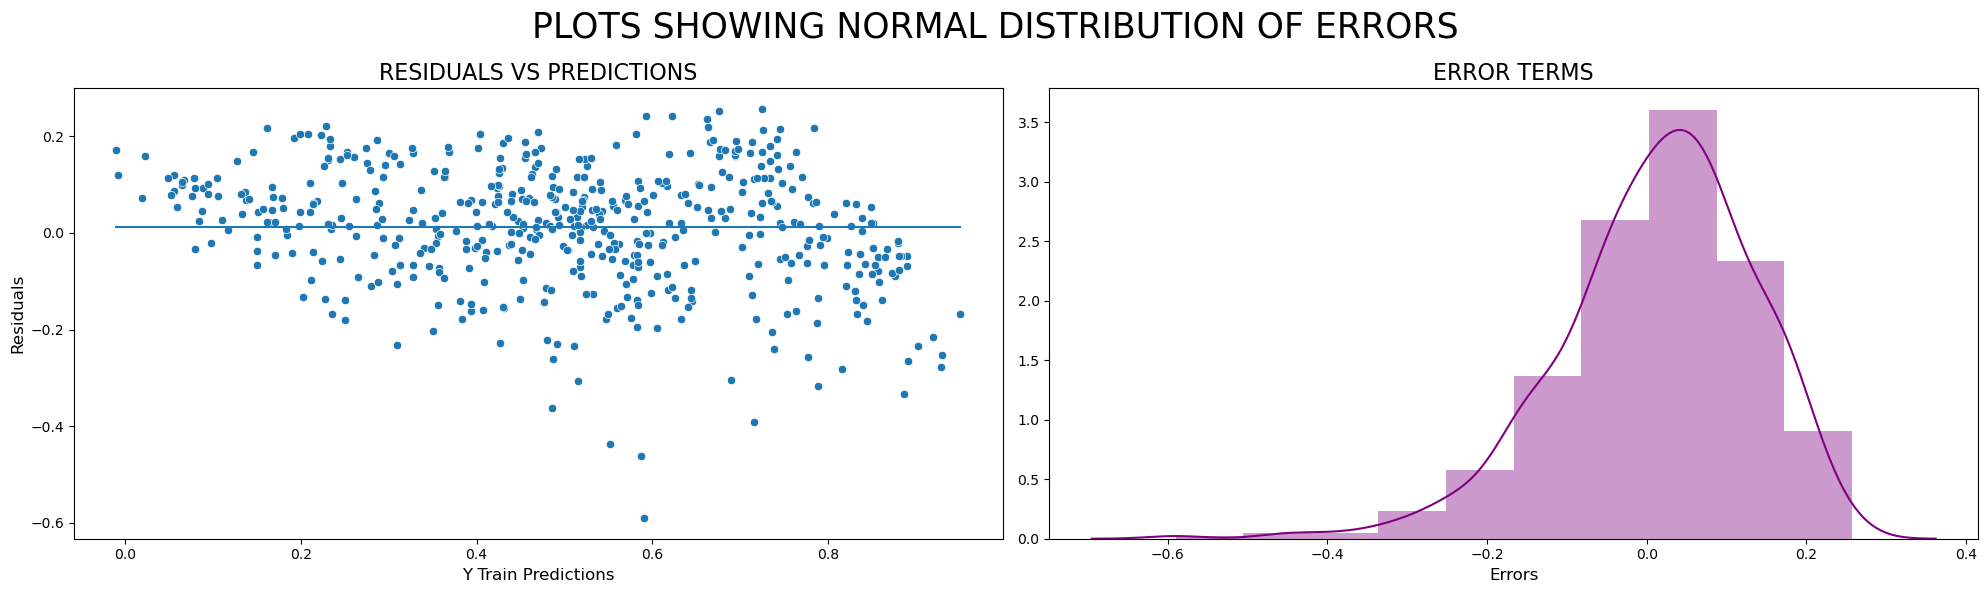

In [321]:
# Building subplots:

fig, ax= plt.subplots(nrows= 1, ncols= 2, figsize= (20, 6))

# Setting main title
plt.suptitle('plots showing normal distribution of errors'.upper(), fontsize= 25)

# Populating first plot:
sns.scatterplot(y= residuals.values, x= ytrain_pred.values, palette= 'Purples', ax= ax[0])
sns.lineplot(y= residuals.mean(), x= ytrain_pred.values, palette= 'Purples', ax= ax[0])

# Title,ylabel and xlabel setting of first plot:
ax[0].set_title('residuals vs predictions'.upper(), fontsize= 16)
ax[0].set_ylabel('residuals'.title(), fontsize= 12)
ax[0].set_xlabel('y train predictions'.title(), fontsize= 12)

# Populating second plot:
sns.distplot(residuals, bins=10, color= 'Purple', ax= ax[1]) 

# Titles, ylabels and xlabels setting of second plot:
ax[1].set_title('error terms'.upper(), fontsize= 16)
ax[1].set_ylabel('')
ax[1].set_xlabel('errors'.title(), fontsize= 12)
 
plt.tight_layout()
plt.show()

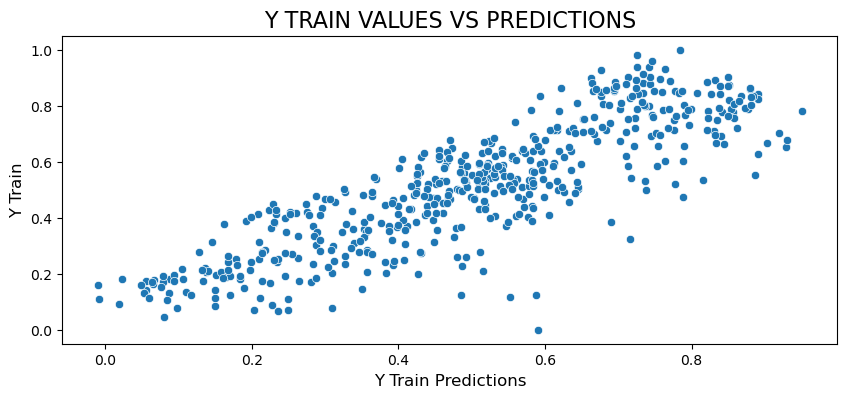

In [322]:

# Initiating a variable to save Series containing residuals
residuals= y_train-ytrain_pred

# Plotting residuals against predicted values

# Defining Figure Dimensions
plt.figure(figsize= (10,4))

# Plotting the residuals
sns.scatterplot(y= y_train, x=ytrain_pred, palette= 'Purples')

#Setting title, ylabel and xlabel
plt.title('y train values vs predictions'.upper(), fontsize= 16)
plt.ylabel('y train'.title(), fontsize= 12)
plt.xlabel('y train predictions'.title(), fontsize= 12)

plt.show()



 Corelation test bw Error Terms

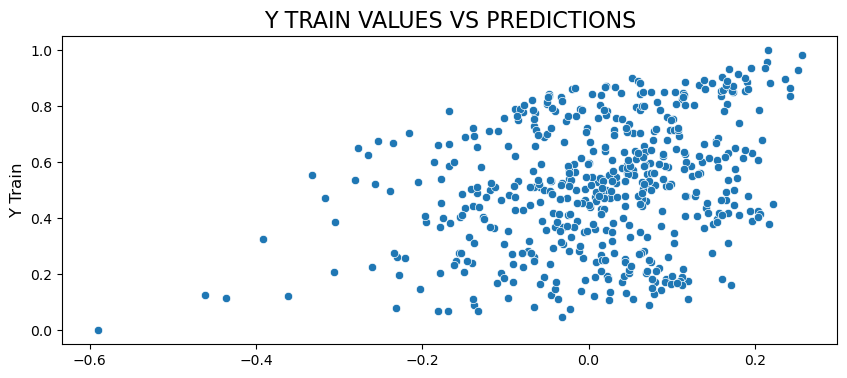

In [323]:
# Initiating a variable to save Series containing residuals
residuals= y_train-ytrain_pred

# Plotting residuals against predicted values

# Defining Figure Dimensions
plt.figure(figsize= (10,4))

# Plotting the residuals
sns.scatterplot(y= y_train, x= residuals, palette= 'Purples')

# Setting title, ylabel and xlabel
plt.title('y train values vs predictions'.upper(), fontsize= 16)
plt.ylabel('y train'.title(), fontsize= 12)

plt.show()


Prediction finding


Scalling on test data

In [324]:

# Inspecting test data before scaling:
bb_test.sample(5)


yr  holiday  workingday     temp    atemp      hum  windspeed   cnt  \
142   0        0           1 25.89835 29.51480 81.00000   15.66741  4274   
157   0        0           1 29.00750 32.79750 59.79170   12.58314  4833   
515   1        0           1 27.88000 31.56645 49.29170   13.08369  7338   
691   1        0           1 15.10165 18.93895 56.87500    9.91741  3910   
153   0        0           1 25.42000 29.35665 35.41670   16.95911  5312   

     Spring  Summer  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  \
142       0       1  ...    0    0    1    0    0    0    0    0   
157       0       1  ...    0    0    0    0    0    0    1    0   
515       0       1  ...    0    0    0    0    0    1    0    0   
691       0       0  ...    0    0    0    0    0    0    0    0   
153       0       1  ...    0    0    0    0    0    0    0    0   

     Misty and Cloudy  clear to Partly cloudy  
142                 1                       0  
157                 0                       1  
515                 0                       1  
691                 0                       1  
153                 0                       1  

[5 rows x 30 columns]

In [325]:

# Scaling the variables and saving in our dataframe:
bb_test[scaler_list]= scaler.transform(bb_test[scaler_list])


In [326]:
# Inspecting test data post scaling:
bb_test.sample(5)

yr  holiday  workingday    temp   atemp     hum  windspeed     cnt  \
81    0        0           1 0.35865 0.33980 0.86516    0.41267 0.24149   
118   0        0           1 0.56181 0.54920 0.47102    0.42514 0.52612   
503   1        0           0 0.67395 0.64035 0.47016    0.08958 0.95168   
572   1        0           1 0.90032 0.85997 0.61271    0.23796 0.79176   
201   0        0           1 0.94185 0.98093 0.71232    0.38636 0.43281   

     Spring  Summer  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  \
81        0       1  ...    0    0    0    0    0    0    0    1   
118       0       1  ...    0    0    0    0    0    0    0    0   
503       0       1  ...    0    0    0    1    0    0    0    0   
572       0       0  ...    0    0    0    0    0    0    0    0   
201       0       0  ...    0    0    0    0    0    1    0    0   

     Misty and Cloudy  clear to Partly cloudy  
81                  1                       0  
118                 0                       1  
503                 0                       1  
572                 0                       1  
201                 1                       0  

[5 rows x 30 columns]

Partitioning data into X_Test and y_Test

In [327]:

y_test= bb_test.pop('cnt')
X_test= bb_test


In [328]:
# Inspection X_test
X_test.head()

yr  holiday  workingday    temp   atemp     hum  windspeed  Spring  \
184   0        1           0 0.83178 0.76966 0.65736    0.08422       0   
535   1        0           1 0.90135 0.84259 0.61013    0.15373       0   
299   0        0           1 0.51196 0.49615 0.83770    0.33421       0   
221   0        0           1 0.88163 0.79534 0.43710    0.33957       0   
152   0        0           1 0.81725 0.74147 0.31430    0.53741       0   

     Summer  Winter  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  \
184       0       0  ...    0    0    1    0    0    0    0    0   
535       1       0  ...    0    0    0    0    0    0    0    1   
299       0       1  ...    1    0    0    0    0    1    0    0   
221       0       0  ...    0    0    0    0    0    0    0    1   
152       1       0  ...    0    0    0    0    0    1    0    0   

     Misty and Cloudy  clear to Partly cloudy  
184                 1                       0  
535                 0                       1  
299                 1                       0  
221                 0                       1  
152                 0                       1  

[5 rows x 29 columns]

In [329]:
# Inspecting the test set shape:

print(f'X_test shape is: {X_test.shape}')
print(f'y_test shape is: {y_test.shape}')

X_test shape is: (219, 29)
y_test shape is: (219,)


# Actual Prediction

In [333]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_10.columns]

In [334]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

# Prediction Evaluation 

<Figure size 1000x400 with 0 Axes>

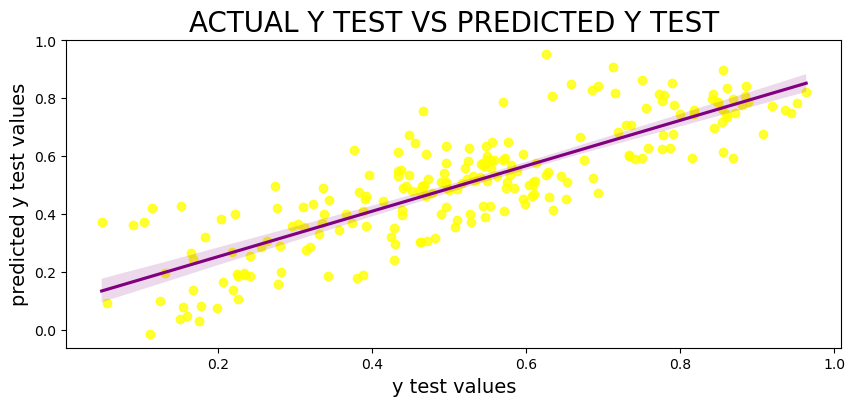

In [336]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize= (10, 4)) 

# Plotting figure
sns.regplot(x= y_test,y= y_test_pred, scatter_kws= {'color': 'yellow'}, line_kws= {'color': 'purple'})

# Setting title, X and Y labels
plt.title('actual y test vs predicted y test'.upper(), fontsize=20)
plt.xlabel('y test values', fontsize=14)
plt.ylabel('predicted y test values', fontsize=14)

plt.show()

In [338]:
print('R2 score of test data predictions:', round(r2_score(y_pred= y_test_pred, y_true= y_test), 5))
print('R2 score of train data predictions:', round(r2_score(y_pred= ytrain_pred, y_true= y_train), 5))
print('Absolute difference between R2 scores of test and train dataset predictions:',
     abs(round(r2_score(y_pred= y_test_pred, y_true= y_test) -  r2_score(y_pred= ytrain_pred, y_true= y_train), 5)))

R2 score of test data predictions: 0.69441
R2 score of train data predictions: 0.70236
Absolute difference between R2 scores of test and train dataset predictions: 0.00795


Difference   bw train and test model results is less than 5%. so it is  generalized model with app 1% difference.

# Prediction Eq

In [340]:

# Initiating const variable for constant
const= 0.2136      # taken from X_train_10 OLS model above

# Parameters Series:
parameter_series= pd.Series(lm.params)
print(parameter_series)


yr           0.25691
temp         0.72665
windspeed   -0.01683
Spring      -0.04097
Jul         -0.12904
Sat          0.03701
dtype: float64


In [341]:
# Equation:

print(f'Demand = {round(const, 3)}')
for i in range(len(parameter_series)):
    if i != len(parameters_series)-1:
        print(f'\t{parameter_series.index[i]} x {round(parameter_series.values[i], 3)} + ')
    else:
        print(f'\t{parameter_series.index[i]} x {round(parameter_series.values[i], 3)} ')

Demand = 0.214
	yr x 0.257 + 
	temp x 0.727 + 
	windspeed x -0.017 + 
	Spring x -0.041 + 
	Jul x -0.129 + 
	Sat x 0.037 


In [344]:
# Defining a function to find top 'n' features
def nImportantFeatures(series, n):
    series= series.sort_values(key= lambda x: abs(x), ascending= False)
    return series.head(n)

In [345]:
# Identifying all features in decreasing order of importance/ relevance
descending_importance= nImportantFeatures(parameter_series, len(parameter_series))
descending_importance

temp         0.72665
yr           0.25691
Jul         -0.12904
Spring      -0.04097
Sat          0.03701
windspeed   -0.01683
dtype: float64

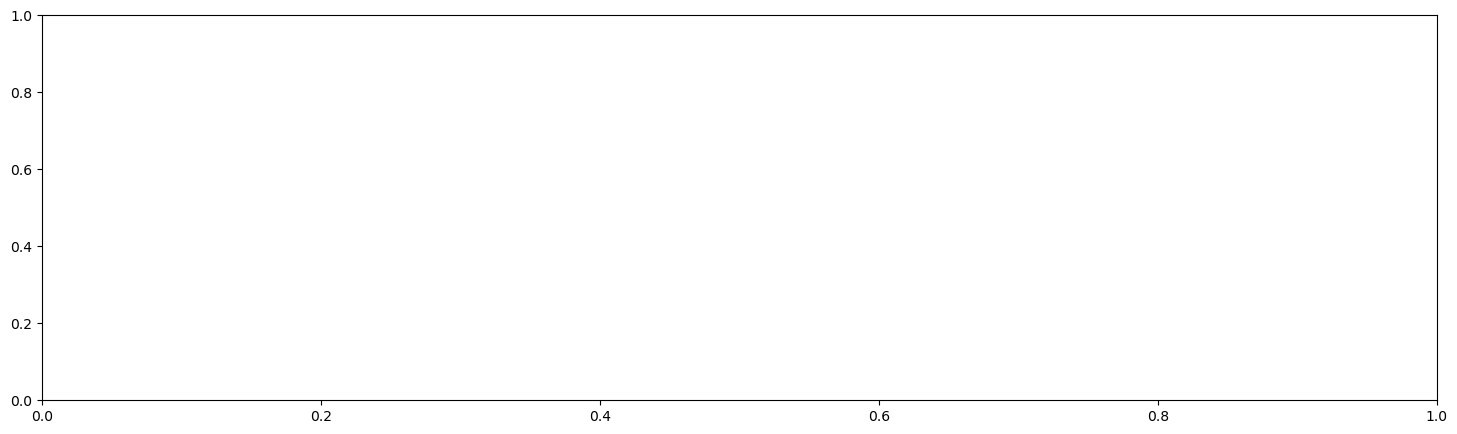

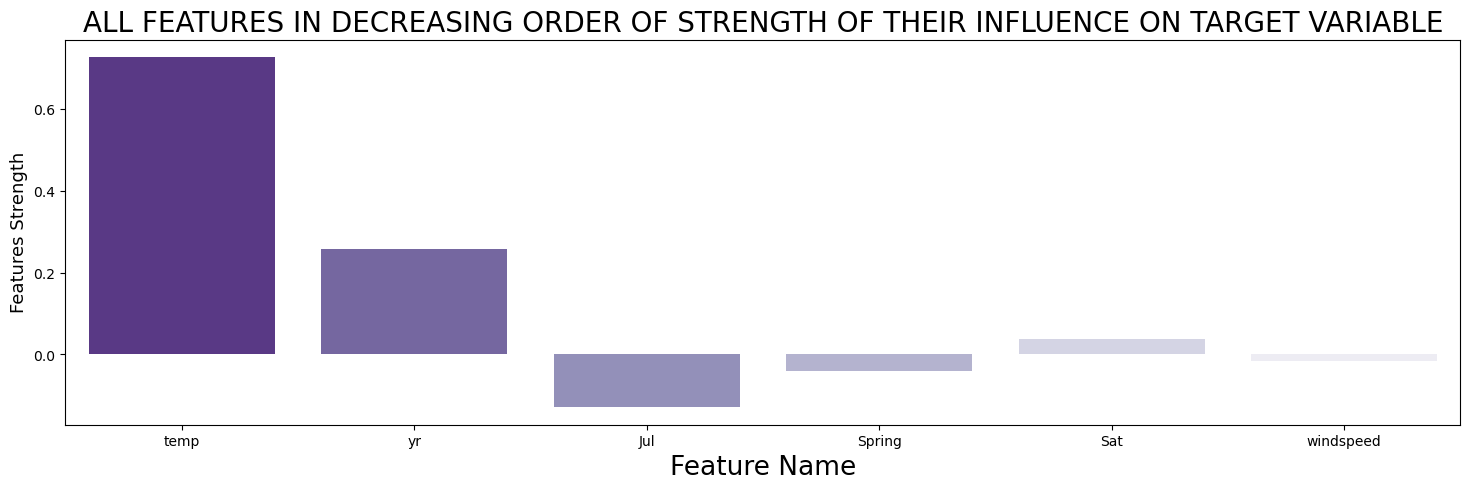

In [347]:
# Defining plot size
plt.figure(figsize= (18, 5))

#Plotting
sns.barplot(x= descending_importance.index, y= descending_importance.values, palette= 'Purples_r')

# Defining PLot Title, X Label and Y Label
plt.title('all features in decreasing order of strength of their influence on target variable'.upper(), fontsize= 20)
plt.xlabel('feature name'.title(), fontsize= 19)
plt.ylabel('features strength'.title(), fontsize= 13)

plt.show()


# Business Recomendations

In [348]:
# Identifying Top predictors
top_5_features= nImportantFeatures(parameter_series, 5)
top_5_features

temp      0.72665
yr        0.25691
Jul      -0.12904
Spring   -0.04097
Sat       0.03701
dtype: float64

# plotting top 5 features

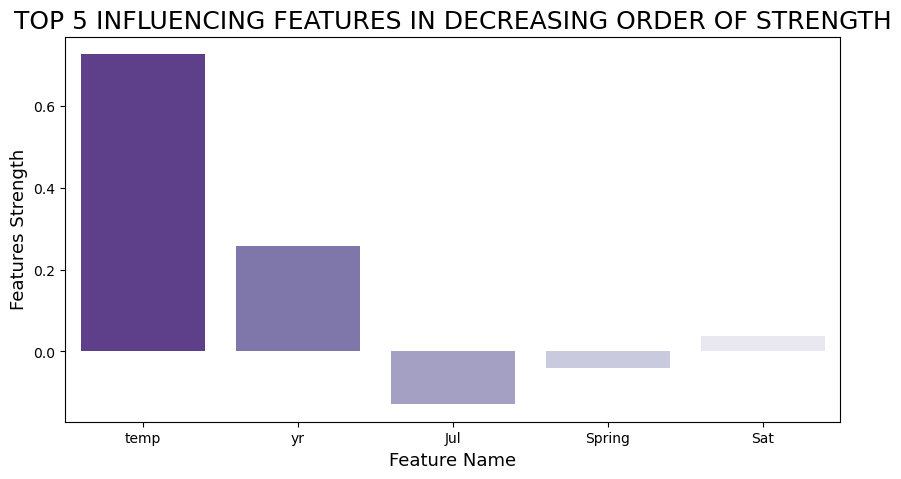

In [349]:
# Defining plot size
plt.figure(figsize= (10, 5))

#Plotting
sns.barplot(x= top_5_features.index, y= top_5_features.values, palette= 'Purples_r')

# Defining PLot Title, X Label and Y Label
plt.title('top 5 influencing features in decreasing order of strength'.upper(), fontsize= 18)
plt.xlabel('feature name'.title(), fontsize= 13)
plt.ylabel('features strength'.title(), fontsize= 13)

plt.show()